### **Hotel Booking Demand Dataset**
**Dataset Source**: [kaggle.com](https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand/data)

**Created by:**

- M. Fauzi Hakim (JCDS-2304-004)
- Antonius Andriyanto (JCDS-2304-007)

**Contents overview: `Analysis Only`**

- Business Understanding
- Data Understanding
- Exploratory Data Analysis
- RFM Analysis
- Conclusion and Recommendation


<hr>

# <center>**Analisis Segmentasi Tamu & Prediksi Pembatalan Pemesanan Hotel**




<center><img src="https://www.algarveportugaltourism.com/images/hotels/vila-vita-parc-resort.jpeg" width="500" height="340"> <img src="https://static-new.lhw.com/HotelImages/Final/LW1311/lw1311_119463943_720x450.jpg" width="500" height="340"> </center>




<hr>

<hr>

## <center>**Business Understanding**

<hr>

***Stakeholder***: ***Revenue Manager*** dari Manajemen Hotel Tuvoli


> ### **Context**

Manajemen Hotel `Tuvoli` yang menjalankan *`City Hotel`* di Lisbon, Portugal dan *`Resort Hotel`* di Algrave, Portugal tengah mengalami tantangan signifikan dalam mengoptimalkan strategi pemesanan hotel mereka. Manajemen hotel tersebut berupaya untuk memaksimalkan tingkat hunian dan pendapatan sambil meminimalkan pembatalan pemesanan hotel mereka. Hal ini mendorong pihak manajemen Hotel `Tuvoli` meminta bantuan kepada konsultan data `BetaMachineLearning` untuk menganalisis data-data pemesanan kamar hotel yang mereka miliki dan menarik *insight* yang berguna untuk meningkatkan profitabilitas mereka. Analisis segmentasi tamu yang efektif dan analisis prediktif sangat penting untuk mencapai tujuan ini. 

Adanya analisis segmentasi tamu memungkinkan pihak manajamen hotel untuk mengelompokkan tamu berdasarkan sejumlah karakteristik mereka. Informasi ini nantinya berkontribusi untuk memberikan *insight* mendalam tentang nilai tamu berdasarkan perilaku mereka. Sementara itu, analisis prediktif menggunakan *machine learning* dalam memprediksi pembatalan pemesanan hotel berperan penting bagi pihak hotel karena memungkinkan mereka untuk secara proaktif mengelola risiko pembatalan pemesanan. Kedua analisis ini jika diintegrasikan secara bersamaan diharapkan mampu memaksimalkan pendapatan hotel.

> ### **Problem Statement**

Bagaimana pemanfaatan analisis segmentasi tamu dan pemanfaatan *Machine Learning* dalam memprediksi pembatalan pemesanan hotel secara efektif dapat mengoptimalkan strategi pemesanan hotel dan strategi manajemen profit secara keseluruhan?

> ### **Goals**

1. Analisis segmentasi tamu menggunakan metrik RFM bertujuan untuk:
    - mengidentifikasi dan menyegmentasi tamu berdasarkan perilaku pemesanan mereka menggunakan metrik RFM.
    - menentukan segmen tamu bernilai tinggi yang memberikan kontribusi signifikan terhadap pendapatan hotel.
    - mengembangkan strategi pemasaran yang ditargetkan untuk berbagai segmen tamu.

2. Analisis prediktif pembatalan pemesanan hotel bertujuan untuk:
    - membangun model prediktif untuk mengidentifikasi kemungkinan pembatalan pemesanan.
    - menerapkan langkah-langkah proaktif untuk mengurangi dampak pembatalan berdasarkan prediksi model.

> ### **Analytic Approach**

1. Analisis RFM:
   - mengidentifikasi prilaku tamu berdasarkan terakhir kali melakukan transaksi (Recency), seberapa sering melakukan transaksi (Frequency) dan berapa banyak uang yang dihabiskan (Monetary).
   - Menyegmentasi tamu ke dalam berbagai kategori RFM (misalnya, bernilai tinggi, sering, baru, dan berisiko).

2. Analisis prediktif menggunakan *Machine Learning*:
   - Memilih fitur yang terkait dengan pembatalan pemesanan.
   - Melatih model *Machine Learning* dengan algoritma yang paling efektif untuk memprediksi pembatalan pemesanan.
   - Mengevaluasi kinerja model menggunakan metrik evaluasi yang telah ditentukan.

3. Integrasi dan Pengembangan Strategi:
   - Menggabungkan wawasan dari analisis RFM dan prediksi pembatalan.
   - Mengembangkan strategi untuk melibatkan tamu bernilai tinggi dan mengurangi pembatalan.
   - Menerapkan kampanye pemasaran yang ditargetkan dan memantau efektivitasnya.

> ### **Metric Evaluation**


![image.png](https://www.researchgate.net/publication/328148379/figure/fig1/AS:679514740895744@1539020347601/Model-performance-metrics-Visual-representation-of-the-classification-model-metrics.png)

- *(TP) True Positive*: Tamu diprediksi (predict) cancel dan kenyataannya (actual) benar-benar cancel.
- *(FP) False Positive*: Tamu diprediksi (predict) cancel, tapi kenyataannya (actual) tidak cancel.
- *(TN) True Negative*: Tamu diprediksi (predict) tidak cancel dan kenyataannya (actual) tidak cancel.
- *(FN) False Negative*: Tamu diprediksi (predict) tidak cancel, tapi kenyataannya (actual) cancel.

**Error Types:**

1. Type 1 error : False Positive

Konsekuensi : tamu yang seharusnya tidak *cancel* akan dianggap *cancel* tentunya ini akan membuat kekecewaan dari tamu terhadap pelayanan hotel apabila kamar tidak tersedia akibat *overbook*.

2. Type 2 error : False Negative

Konsekuensi : tamu yang seharusnya *cancel* akan dianggap tidak *cancel* tentunya ini akan membuat kerugian bagi perusahaan di bidang hotel tersebut.

Berdasarkan *problem statement* dan *goals* dari analisis ini, maka prioritas utamanya adalah memastikan bahwa model *machine learning* dapat memprediksi setiap pembatalan yang mungkin terjadi  dengan ketepatan yang tinggi. Dengan keperluan untuk mempertimbangkan keharmonisan prediksi seperti F1-score tetapi lebih menekankan pada pengurangan Type I error (false positive) atau lebih fokus pada recall, **maka F2-score menjadi pilihan yang baik**.

F2-score merupakan varian dari F1 score yang memberikan bobot lebih pada recall daripada precision. Penggunaan F2-score dalam konteks prediksi pembatalan pemesanan hotel mencerminkan strategi bisnis yang memprioritaskan meminimalkan Type 2 error (false negative)—yang berarti memastikan model memprediksi sebanyak mungkin pembatalan yang sebenarnya.


<hr>

## <center> **Data Understanding**

<hr>

In [18]:
# Data Manipulation
import pandas as pd
import numpy as np
import math

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import scipy.stats as stats

# Preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.compose import ColumnTransformer
import category_encoders as ce
from category_encoders import BinaryEncoder

# Model Selection and Evaluation
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, KFold, RandomizedSearchCV, GridSearchCV, cross_validate
from sklearn.metrics import accuracy_score, mean_squared_error, recall_score, precision_score, f1_score, precision_recall_curve, roc_curve
from sklearn.metrics import make_scorer, fbeta_score, roc_auc_score, recall_score, f1_score, classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, PrecisionRecallDisplay, RocCurveDisplay

# Algorithms
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier, XGBRegressor
from sklearn.cluster import KMeans

# Feature Selection
from sklearn.feature_selection import SelectPercentile, SelectKBest, f_regression

# Pipelines
from sklearn.pipeline import Pipeline, FeatureUnion
from imblearn.pipeline import Pipeline as ImbPipeline

# Imbalance Methods
from imblearn.over_sampling import RandomOverSampler, SMOTE, SMOTENC
from imblearn.under_sampling import RandomUnderSampler, NearMiss

# Custom Transformers
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import TransformedTargetRegressor

# Statistics
from scipy.stats import normaltest, chi2_contingency

# Miscellaneous
from termcolor import colored
import lightgbm as lgb
import pickle
import shap

# Warning Handling
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.filterwarnings("ignore")

# Maximizing Columns and Columns Width
pd.set_option('display.max_columns', None)
pd.set_option("display.max_colwidth", 1)


> ### **Data Overall**

Dataset ***Hotel Booking Demand*** ini berasal dari sebuah [artikel ilmiah](https://www.sciencedirect.com/science/article/pii/S2352340918315191) yang ditulis oleh Nuno Antonio, Ana Almeida dan Luis Nunes dalam jurnal ***Data in Brief*** pada tahun 2019. Dataset ini mulanya berjumlah **2 buah dataset**, yaitu **dataset *city hotel*** yang merujuk ke salah satu hotel di Lisbon, Portugal dan **dataset *resort hotel*** yang merujuk ke salah satu hotel di Algarve, Portugal.

Dataset ini mencakup pemesanan hotel antara tanggal 1 Juli 2015 dan 31 Agustus 2017. Struktur *dataset* ini memiliki 32 kolom dan setiap barisnya merepresentasikan pemesanan hotel. Di karenakan dataset ini merupakan data hotel yang riil, semua elemen yang berkaitan dengan identitas hotel atau pemesan telah disamarkan karena alasan anonimitas seperti ID dalam kolom ***agent*** dan ***company***.



In [19]:
# membaca dan menampilkan dataset
df=pd.read_csv('hotel_bookings.csv')
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [20]:
# menampilkan infomasi struktur dan tipe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

> ### **Structure of Dataset Hotel Booking Demand**

Output **df.info()** untuk dataset ***hotel booking demand*** menunjukan bahwa dataset terdiri atas 119.390 *entries* data dalam 32 kolom, masing-masing kolom mewakili aspek-aspek yang berbeda dari pemesanan layanan hotel. 

Dataset ini mencakup berbagai jenis data, dengan campuran tipe data objek (data tekstual), bilangan bulat dan bilangan pecahan dengan pesebaran sebagai berikut:

- **Data-data Kategorik** (`object`): `hotel`, `arrival_date_month`, `meal`, `country`, `market_segment`, `distribution_channel`, `reserved_room_type`, `assigned_room_type`, `deposit_type`, `customer_type`, `reservation_status`, dan `reservation_status_date`. Kolom-kolom tersebut memberikan detail yang kaya tentang jenis hotel, tanggal kedatangan, tipe makanan, negara asal tamu, segmen pasar, saluran distribusi, tipe kamar yang dipesan dan yang diberikan, tipe deposit, tipe pelanggan, status reservasi, dan tanggal status reservasi. Jumlah *entries non-null* data mengindikasi kelengkapan data. 
Kolom-kolom ini berisi nilai non-null untuk semua atau sebagian besar *entries* data.

- **Data-data Numerik Diskrit** (`int64`): Kolom-kolom seperti `is_canceled`, `lead_time`, `arrival_date_year`, `arrival_date_week_number`, `arrival_date_day_of_month`, `stays_in_weekend_nights`, `stays_in_week_nights`, `adults`, `children`, `babies`, `is_repeated_guest`, `previous_cancellations`, `previous_bookings_not_canceled`, `booking_changes`, `days_in_waiting_list`, `required_car_parking_spaces`, `total_of_special_requests`, dan `agent`, `company` memiliki tipe data berupa bilangan bulat yang menggambarkan informasi pemesanan, jumlah tamu, jumlah malam menginap, status tamu, perubahan pemesanan, jumlah permintaan khusus, dan pengidentifikasi agen serta perusahaan. Sejumlah kolom terindikasi memiliki data yang hilang berdasarkan jumlah *entries non-null* data pada kolom terkait.

- **Data-data Numerik Kontinu** (`float64`): Kolom `adr` (Average Daily Rate), yang menunjukkan data jumlah pembayaran per hari. Ini penting untuk analisis keuangan dan penilaian pendapatan.

Sejumlah kolom yang terindikasi memiliki data yang hilang karena jumlah non-null kurang dari total *entries* data adalah `children`, `country`, `agent` dan `company`. Kolom-kolom tersebut memerlukan perlakuan tertentu pada *data pre-process* guna menghasilkan analisis yang komprehensif dan meningkatkan efektivitas model.


> ### **Attribute Information**
Dalam dataset ini terdapat beberapa kolom informasi mengenai :

| *`Attribute`*                        | *Description* |
|--------------------------------------|---------------|
| `hotel`                            | Tipe hotel yang dipesan, bisa berupa 'City Hotel' atau 'Resort Hotel'. |
| `is_canceled`                      | Indikator apakah pemesanan dibatalkan (1) atau tidak (0). |
| `lead_time`                        | Selisih hari antara jadwal *check-in* dan tanggal pemesanan. |
| `arrival_date_year`                | Tahun jadwal *check-in* tamu. |
| `arrival_date_month`               | Bulan jadwal *check-in* tamu. |
| `arrival_date_week_number`         | Nomor minggu dalam setahun dari jadwal *check-in* tamu. |
| `arrival_date_day_of_month`        | Tanggal jadwal *check-in* tamu. |
| `stays_in_weekend_nights`          | Jumlah malam pada akhir pekan (Sabtu atau Minggu) tamu menginap atau memesan untuk menginap di hotel. |
| `stays_in_week_nights`             | Jumlah malam pada hari kerja (Senin hingga Jumat) tamu menginap atau memesan untuk menginap di hotel. |
| `adults`                           | Jumlah orang dewasa. |
| `children`                         | Jumlah anak-anak. |
| `babies`                           | Jumlah bayi. |
| `meal`                             | Tipe makanan yang dipesan. |
| `country`                          | Negara asal tamu. |
| `market_segment`                   | Penamaan segmen pasar. |
| `distribution_channel`             | Saluran distribusi pemesanan. |
| `is_repeated_guest`                | Indikator apakah tamu pernah menginap sebelumnya (1) atau tidak (0). |
| `previous_cancellations`           | Jumlah pemesanan sebelumnya yang telah dibatalkan oleh tamu. |
| `previous_bookings_not_canceled`   | Jumlah pemesanan sebelumnya yang tidak dibatalkan. |
| `reserved_room_type`               | Kode untuk tipe kamar yang dipesan. |
| `assigned_room_type`               | Kode untuk tipe kamar yang diberikan kepada tamu. |
| `booking_changes`                  | Jumlah perubahan pada pemesanan. |
| `deposit_type`                     | Indikasi apakah pelanggan telah melakukan deposit untuk menjamin pemesanan. |
| `agent`                            | ID agen perjalanan yang melakukan pemesanan. |
| `company`                          | ID perusahaan/entitas yang melakukan pemesanan atau yang bertanggung jawab untuk membayar pemesanan. |
| `days_in_waiting_list`             | Jumlah hari pemesanan berada di daftar tunggu sebelum dikonfirmasi ke tamu. |
| `customer_type`                    | Jenis pemesanan. |
| `adr`                              | Tarif Harian Rata-rata yang didefinisikan dengan membagi jumlah semua transaksi penginapan dengan jumlah total malam menginap. |
| `required_car_parking_spaces`      | Jumlah ruang parkir yang dibutuhkan oleh tamu. |
| `total_of_special_requests`        | Jumlah permintaan khusus yang diajukan oleh tamu. |
| `reservation_status`               | Status terakhir reservasi. |
| `reservation_status_date`          | Tanggal saat status reservasi terakhir diperbarui. |

In [21]:
# menampikan jumlah dan unique value pada setiap kolom

listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

uniqueVal = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)

pd.set_option('display.max_colwidth', 0)

uniqueVal

,Column Name,Number of Unique,Unique Sample
0,hotel,2,"[Resort Hotel, City Hotel]"
1,is_canceled,2,"[0, 1]"
2,lead_time,479,"[342, 737, 7, 13, 14, 0, 9, 85, 75, 23, 35, 68, 18, 37, 12, 72, 127, 78, 48, 60, 77, 99, 118, 95, 96, 69, 45, 40, 15, 36, 43, 70, 16, 107, 47, 113, 90, 50, 93, 76, 3, 1, 10, 5, 17, 51, 71, 63, 62, 101, 2, 81, 368, 364, 324, 79, 21, 109, 102, 4, 98, 92, 26, 73, 115, 86, 52, 29, 30, 33, 32, 8, 100, 44, 80, 97, 64, 39, 34, 27, 82, 94, 110, 111, 84, 66, 104, 28, 258, 112, 65, 67, 55, 88, 54, 292, 83, 105, 280, 394, ...]"
3,arrival_date_year,3,"[2015, 2016, 2017]"
4,arrival_date_month,12,"[July, August, September, October, November, December, January, February, March, April, May, June]"
5,arrival_date_week_number,53,"[27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26]"
6,arrival_date_day_of_month,31,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]"
7,stays_in_weekend_nights,17,"[0, 1, 2, 4, 3, 6, 13, 8, 5, 7, 12, 9, 16, 18, 19, 10, 14]"
8,stays_in_week_nights,35,"[0, 1, 2, 3, 4, 5, 10, 11, 8, 6, 7, 15, 9, 12, 33, 20, 14, 16, 21, 13, 30, 19, 24, 40, 22, 42, 50, 25, 17, 32, 26, 18, 34, 35, 41]"
9,adults,14,"[2, 1, 3, 4, 40, 26, 50, 27, 55, 0, 20, 6, 5, 10]"


> ### **Summary Unique Value on Each Column:**

1. **`hotel`**: Terdapat 2 nilai unik yaitu 'Resort Hotel' dan 'City Hotel'.
2. **`is_canceled`**: Terdapat 2 nilai unik yaitu 0 (tidak dibatalkan) dan 1 (dibatalkan).
3. **`lead_time`**: Memiliki 479 nilai unik, merepresentasikan jarak waktu dari tanggal pemesanan hingga tanggal kedatangan.
4. **`arrival_date_year`**: Terdapat 3 nilai unik, yaitu tahun 2015, 2016, dan 2017.
5. **`arrival_date_month`**: Terdapat 12 nilai unik, merepresentasikan setiap bulan dari Januari hingga Desember.
6. **`arrival_date_week_number`**: Memiliki 53 nilai unik, merepresentasikan minggu-minggu dalam setahun.
7. **`arrival_date_day_of_month`**: Terdapat 31 nilai unik, merepresentasikan setiap hari dalam sebulan.
8. **`stays_in_weekend_nights`**: Memiliki 17 nilai unik, menunjukkan variasi lama menginap saat akhir pekan.
9. **`stays_in_week_nights`**: Memiliki 35 nilai unik, menunjukkan variasi lama menginap pada hari kerja.
10. **`adults`**: Terdapat 14 nilai unik, menunjukkan variasi jumlah orang dewasa per pemesanan.
11. **`children`**: Memiliki 5 nilai unik.
12. **`babies`**: Memiliki 5 nilai unik.
13. **`meal`**: Terdapat 5 jenis paket makanan yang ditawarkan, Tidak ditentukan/SC – tidak ada paket makanan; BB – Bed & Breakfast; HB – Half board (sarapan dan satu makanan lainnya – biasanya makan malam); FB – Full board (sarapan, makan siang, dan makan malam).
14. **`country`**: Memiliki 177 nilai unik, menunjukkan keberagaman asal negara pemesan, ditampilkan dalam fromat ISO 3155–3:2013.
15. **`market_segment`**: Terdapat 8 nilai unik, istilah "TA" merujuk pada "Travel Agents" dan "TO" merujuk pada "Tour Operator".
16. **`distribution_channel`**: Terdapat 5 nilai unik, istilah "TA" merujuk pada "Travel Agents" dan "TO" merujuk pada "Tour Operator".
17. **`is_repeated_guest`**: Terdapat 2 nilai unik, menunjukkan apakah tamu adalah tamu yang berulang (1) atau tidak (0).
18. **`previous_cancellations`**: Memiliki 15 nilai unik, menunjukkan jumlah pembatalan sebelumnya per pemesanan.
19. **`previous_bookings_not_canceled`**: Memiliki 73 nilai unik, menunjukkan jumlah pemesanan sebelumnya yang tidak dibatalkan.
20. **`reserved_room_type`**: Memiliki 10 nilai unik, kode digunakan sebagai ganti penunjukan karena alasan anonimitas.
21. **`assigned_room_type`**: Memiliki 12 nilai unik, kode digunakan sebagai ganti penunjukan karena alasan anonimitas.
22. **`booking_changes`**: Terdapat 21 nilai unik, menunjukkan frekuensi perubahan pada pemesanan.
23. **`deposit_type`**: Terdapat 3 nilai unik, dengan opsi "No Deposit" – tidak ada deposit yang dilakukan; "Non Refund" – deposit dilakukan sebesar nilai total biaya menginap dan tidak dapat dikembalikan; "Refundable"– deposit dilakukan dengan nilai di bawah total biaya menginap dan dapat dikembalikan.
24. **`agent`**: Memiliki 333 nilai unik, menunjukkan variasi ID agen perjalanan yang memesan.
25. **`company`**: Memiliki 352 nilai unik, menunjukkan variasi ID perusahaan yang bertanggung jawab atas pemesanan.
26. **`days_in_waiting_list`**: Memiliki 128 nilai unik, menunjukkan jumlah hari pesanan dalam daftar tunggu sebelum dikonfirmasi.
27. **`customer_type`**: Terdapat 4 nilai unik, "Contrct" - ketika pemesanan memiliki jatah atau jenis kontrak lain yang terkait dengannya; "Group" - ketika pemesanan dikaitkan dengan suatu grup; "Transcient" - ketika pemesanan bukan bagian dari suatu grup atau kontrak, dan tidak dikaitkan dengan pemesanan sementara lainnya; "Transcient-party" - ketika pemesanan bersifat sementara, tetapi dikaitkan dengan setidaknya pemesanan sementara lainnya.
28. **`adr`**: Memiliki 8.038 nilai unik, menunjukkan tarif harian rata-rata per pemesanan.
29. **`required_car_parking_spaces`**: Memiliki 5 nilai unik, menunjukkan jumlah tempat parkir mobil yang dibutuhkan per pemesanan.
30. **`total_of_special_requests`**: Terdapat 6 nilai unik, menunjukkan jumlah permintaan khusus per pemesanan.
31. **`reservation_status`**: Terdapat 3 nilai unik, "Cancel" – pemesanan dibatalkan oleh pelanggan; "Check-Out" – pelanggan telah check in tetapi sudah berangkat; "No-Show "– pelanggan tidak check-in dan tidak memberi tahu pihak hotel alasannya
32. **`reservation_status_date`**: Memiliki 926 nilai unik, menunjukkan tanggal status reservasi (misalnya, tanggal pembatalan atau tanggal *check-out*).


In [22]:
# membuat variabel untuk menyimpan dataset mentah (non-preprocessing)
df_raw = df.copy()
df_raw

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


> ### **Statistical Check**

#### 1. Mengecek Statistika Deskriptif

In [23]:
# Menampilkan statistika deskriptif dari sejumnlah kolom numerik
num_check = df[['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies',
                'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'days_in_waiting_list',
                'adr', 'required_car_parking_spaces', 'total_of_special_requests']]
cat_check = df[['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment', 'distribution_channel',
                'deposit_type', 'customer_type', 'reservation_status']]

display(num_check.describe(), cat_check.describe(include='object'))

,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,104.011416,0.927599,2.500302,1.856403,0.103890,0.007949,0.087118,0.137097,0.221124,2.321149,101.831122,0.062518,0.571363
std,106.863097,0.998613,1.908286,0.579261,0.398561,0.097436,0.844336,1.497437,0.652306,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,18.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.290000,0.000000,0.000000
50%,69.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94.575000,0.000000,0.000000
75%,160.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,737.000000,19.000000,50.000000,55.000000,10.000000,10.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,deposit_type,customer_type,reservation_status
count,119390,119390,119390,118902,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,3,4,3
top,City Hotel,August,BB,PRT,Online TA,TA/TO,No Deposit,Transient,Check-Out
freq,79330,13877,92310,48590,56477,97870,104641,89613,75166


> #### **Summary on Statistical Descriptive Check**

#### **Kolom Numerik**
Berikut adalah *insight* statistik deskriptif dari sejumlah kolom numerik pada dataset:

- **`lead_time`**: Rata-rata lead time (jumlah hari antara pemesanan dan check-in) adalah sekitar **104 hari**, menunjukkan bahwa pemesanan biasanya dilakukan beberapa bulan sebelum tanggal check-in. Nilai maksimum mencapai **737 hari**, menunjukkan adanya pemesanan jauh di muka.
- **`stays_in_weekend_nights`**: Rata-rata tamu menginap sekitar **1 malam** pada akhir pekan (Sabtu-Minggu), dengan maksimum **19 malam**, mengindikasikan preferensi tamu untuk menginap lebih singkat di akhir pekan.
- **`stays_in_week_nights`**: Rata-rata lama menginap pada hari kerja (Senin-Jumat) juga berada di kisaran **1-2 malam**, dengan maksimum **50 malam**. Hal ini mengindikasikan variasi yang lebih luas dalam durasi menginap selama hari kerja.
- **`adults`**: Jumlah orang dewasa per pemesanan bervariasi, dengan rata-rata **2 orang dewasa** dan maksimum **55 orang dewasa**. Hal ini mungkin mencerminkan pemesanan untuk acara grup besar atau perjalanan rombongan.
- **`children`**: Rata-rata pemesanan membawa **0-1 anak**, namun terdapat pemesanan dengan jumlah anak mencapai **10 anak**, menunjukkan variasi dalam kebutuhan tamu keluarga.
- **`babies`**: Mayoritas pemesanan tidak membawa bayi, dengan rata-rata mendekati **0 bayi**. Namun, ada beberapa pemesanan yang mencatat hingga **10 bayi**.
- **`previous_cancellations`**: Beberapa tamu memiliki riwayat pembatalan pemesanan sebelumnya, dengan maksimum **26 kali** pembatalan.
- **`previous_bookings_not_canceled`**: Ada pelanggan yang mempertahankan pemesanan tanpa membatalkan hingga **72 kali**, menunjukkan loyalitas tinggi.
- **`booking_changes`**: Beberapa pemesanan mengalami perubahan hingga **21 kali**, menunjukkan fleksibilitas dan kebutuhan penyesuaian oleh tamu.
- **`days_in_waiting_list`**: Tamu bisa menunggu hingga **391 hari** dalam daftar tunggu sebelum mendapatkan konfirmasi pemesanan, menunjukkan beberapa kasus permintaan yang sangat tinggi.
- **`adr`** (Average Daily Rate): Tarif harian rata-rata adalah sekitar **101,83 EUR**, dengan rentang yang sangat lebar dari **-6,38 EUR** hingga **5400 EUR**. Hal ini mencerminkan variasi besar dalam harga, kemungkinan tergantung pada jenis kamar, musim, dan lama menginap.
- **`required_car_parking_spaces`**: Rata-rata kebutuhan tempat parkir per pemesanan mendekati **1 ruang**, dengan beberapa pemesanan membutuhkan hingga **8 ruang**.
- **`total_of_special_requests`**: Rata-rata jumlah permintaan khusus per pemesanan adalah **0,57**, dengan maksimum **5 permintaan**, menunjukkan bahwa beberapa tamu memiliki kebutuhan khusus selama menginap.

#### **Kolom Kategorik**
Berikut adalah *insight* statistik deskriptif dari sejumlah kolom kategorikal pada dataset:

- **`hotel`**: Dataset terdiri dari dua tipe hotel: **City Hotel** dan **Resort Hotel**. **City Hotel** memiliki jumlah pemesanan terbanyak (**79.330 pemesanan**), yang mungkin mencerminkan preferensi untuk lokasi yang lebih dekat dengan pusat bisnis atau kota.
- **`arrival_date_month`**: Pemesanan tersebar di semua bulan, dengan bulan **Agustus** sebagai bulan check-in paling populer, kemungkinan karena musim liburan musim panas di Eropa.
- **`meal`**: Paket makanan yang paling sering dipilih adalah **BB** (Bed & Breakfast), mencakup lebih dari **75%** dari total pemesanan, menunjukkan preferensi tamu untuk sarapan yang sudah termasuk dalam pemesanan.
- **`country`**: Negara asal pemesan terbanyak adalah **Portugal (PRT)**, yang menyumbang **48.590 pemesanan**, diikuti oleh negara-negara lain seperti Inggris dan Prancis.
- **`market_segment`**: Mayoritas pemesanan dilakukan melalui **Online Travel Agencies (OTA)**, yang mewakili hampir **47%** dari total pemesanan, mencerminkan dominasi kanal online dalam pemesanan hotel.
- **`distribution_channel`**: **TA/TO (Travel Agent/Operator)** adalah saluran distribusi dominan dengan **97.870 pemesanan**, yang dapat mencakup baik pemesanan online maupun offline.
- **`reserved_room_type`** dan **`assigned_room_type`**: Tipe kamar yang paling umum dipesan dan ditetapkan adalah **Tipe A**, namun ada perubahan dari tipe yang dipesan ke tipe yang ditetapkan.
- **`deposit_type`**: Lebih dari **85%** pemesanan dilakukan tanpa deposit (**No Deposit**), menunjukkan fleksibilitas pembayaran yang diinginkan oleh pelanggan.
- **`customer_type`**: Mayoritas pelanggan (**75%**) dikategorikan sebagai **Transient**, yang berarti mereka memesan untuk waktu yang relatif singkat, mencerminkan perilaku tamu yang sering berpindah-pindah.
- **`reservation_status`**: Lebih dari **60%** pemesanan berakhir dengan status **Check-Out**, menunjukkan bahwa sebagian besar tamu berhasil menyelesaikan masa tinggal mereka tanpa pembatalan.

#### **Wawasan terkait Pembuatan Model dan Analisis Segmamtasi**
- **Model Building untuk Prediksi Pembatalan**: Berdasarkan distribusi data, variabel seperti `lead_time`, `previous_cancellations`, `booking_changes`, `deposit_type`, dan `customer_type` dapat menjadi fitur yang sangat relevan untuk membangun model prediksi pembatalan. Misalnya, pemesanan dengan lead time yang lebih panjang atau tanpa deposit mungkin memiliki kemungkinan pembatalan yang lebih tinggi.

- **Analisis Segmentasi Menggunakan RFM**:
  - **Recency**: Mengukur berapa lama sejak tamu terakhir kali melakukan pemesanan. Data `reservation_status_date` bisa digunakan untuk menghitung metrik ini.
  - **Frequency**: Menghitung jumlah pemesanan yang dilakukan oleh tamu. Data `reservation_status_date` bisa sangat berguna di sini.
  - **Monetary**: Mengukur nilai rata-rata transaksi per tamu. Data `adr` bisa digunakan untuk menentukan nilai monetari dari setiap pemesanan.

Segmentasi RFM nantinya dapat digunakan untuk mengidentifikasi kelompok tamu yang berharga tinggi atau loyal, serta mengembangkan strategi pemasaran yang ditargetkan untuk meningkatkan retensi dan nilai jangka panjang pelanggan.

#### 2. Mengecek Distribusi Data

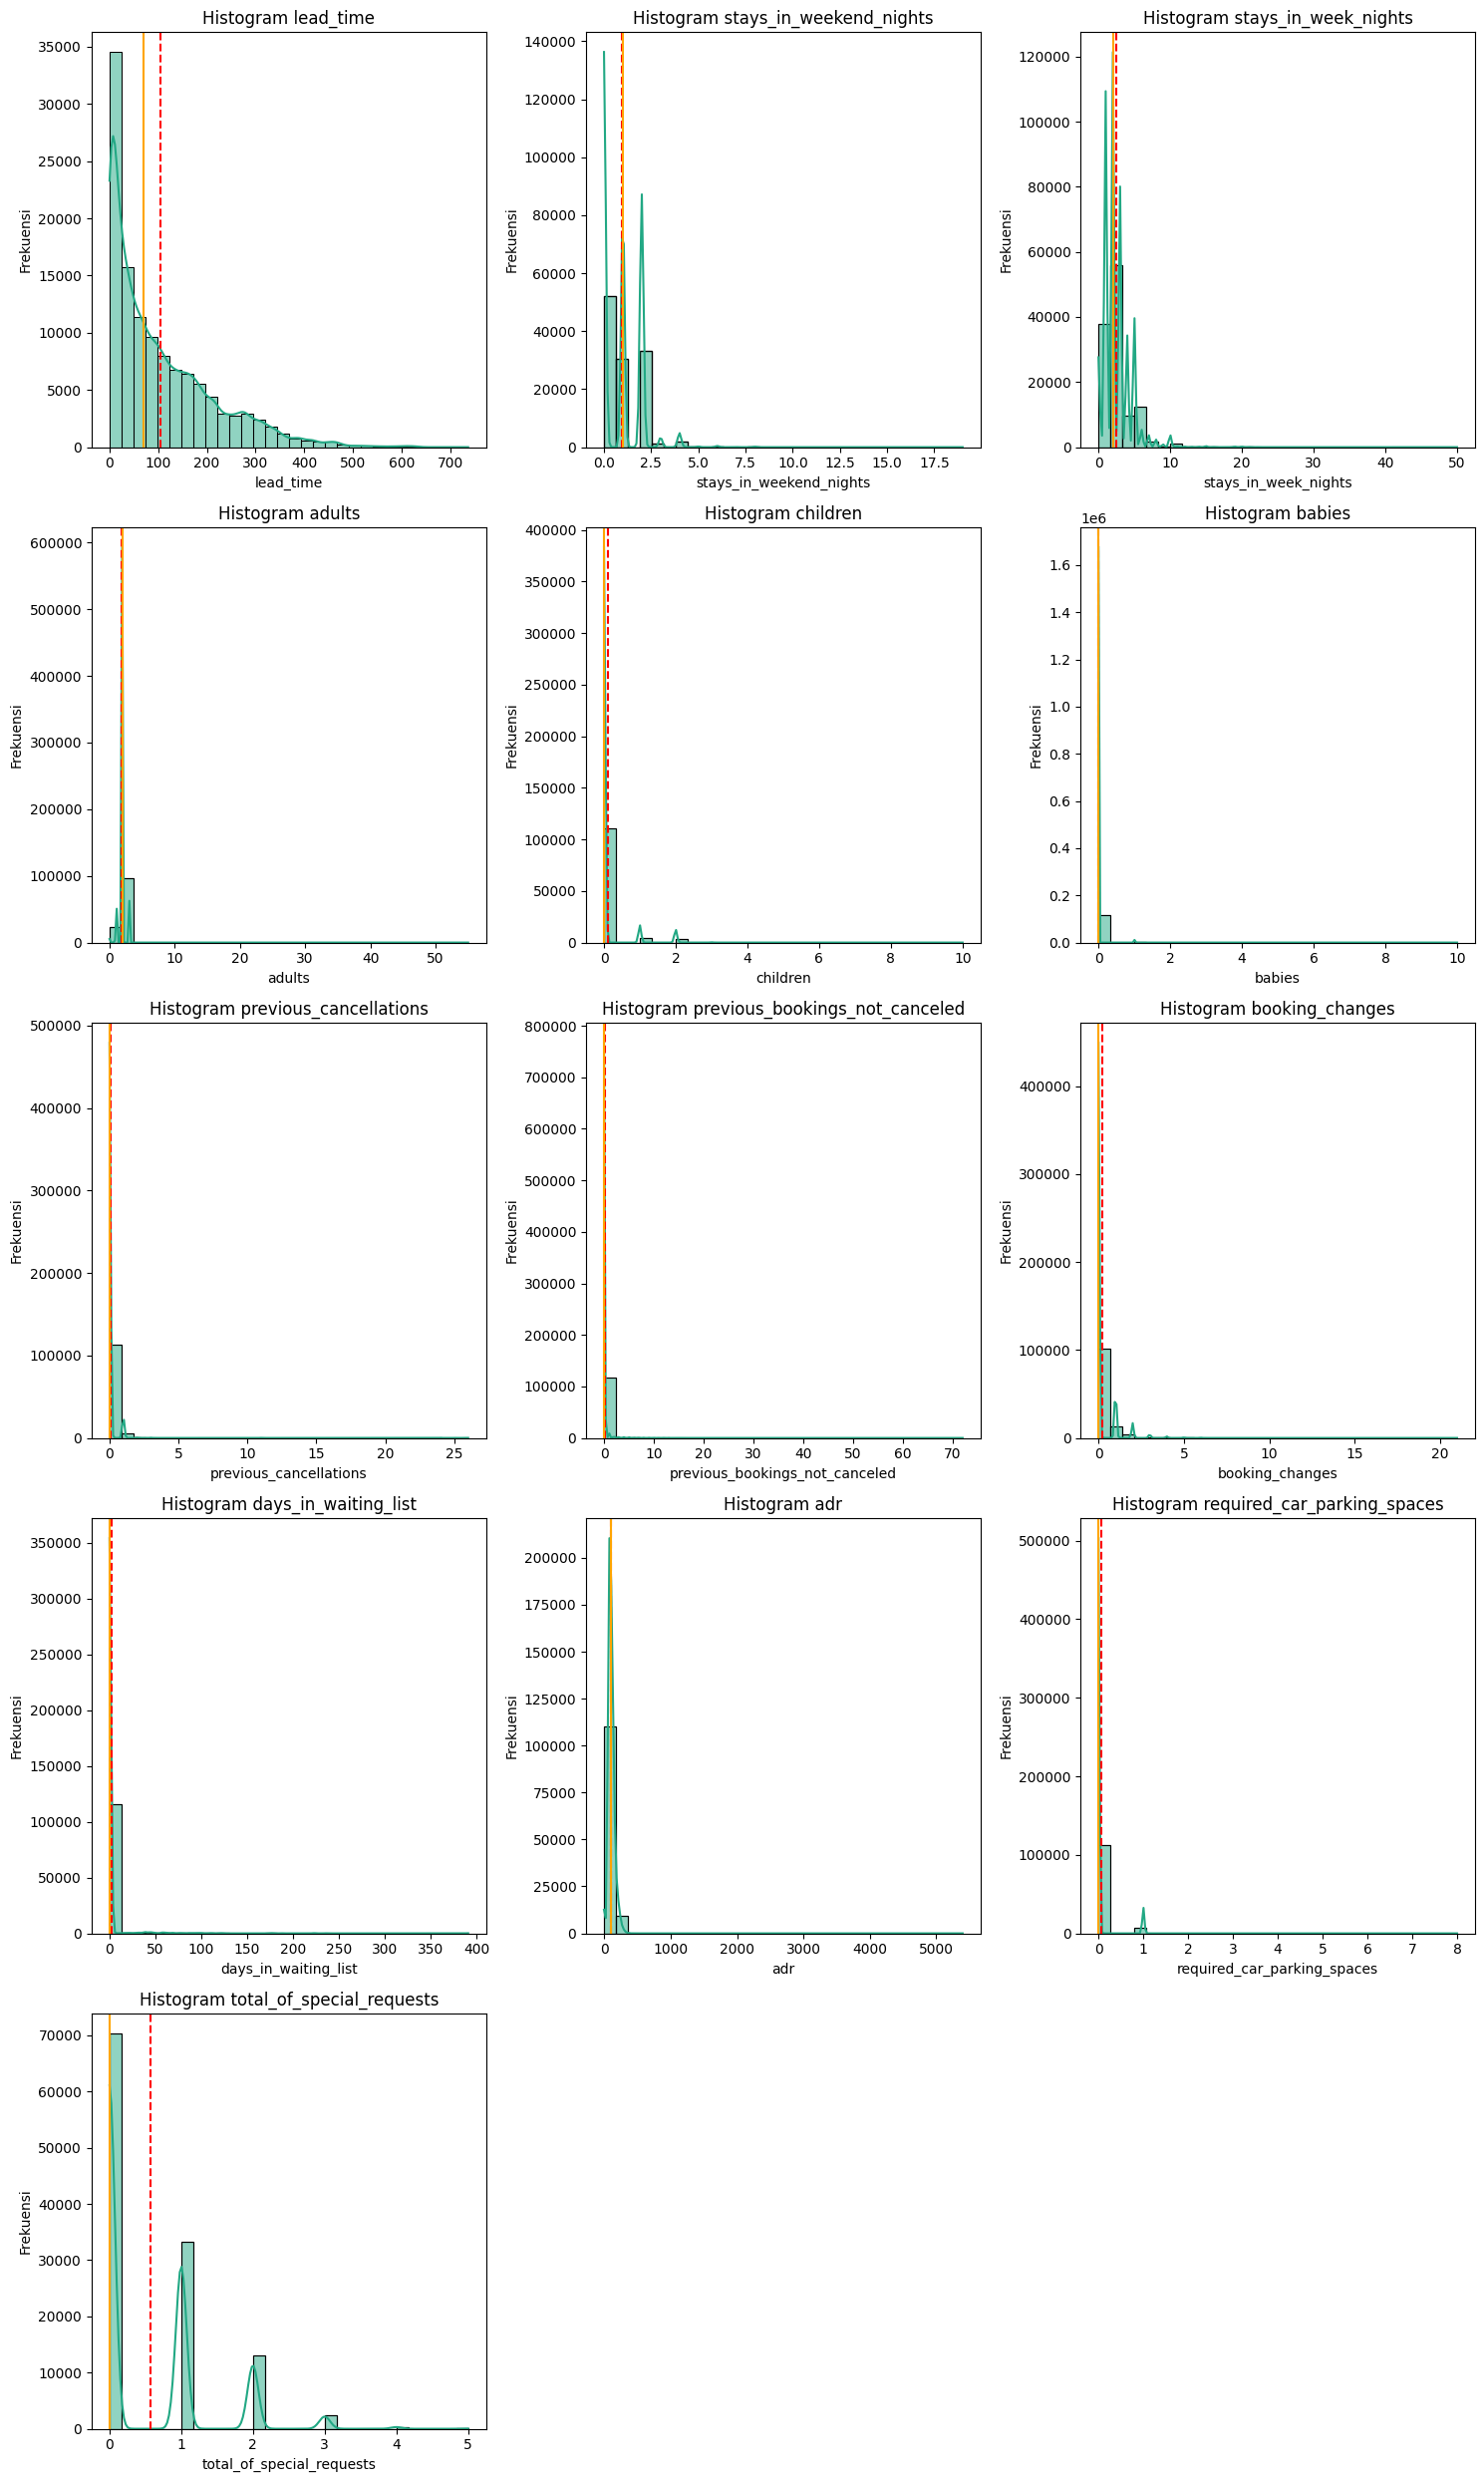

lead_time: P-Value = 0.00000 (tidak terdistribusi normal)
stays_in_weekend_nights: P-Value = 0.00000 (tidak terdistribusi normal)
stays_in_week_nights: P-Value = 0.00000 (tidak terdistribusi normal)
adults: P-Value = 0.00000 (tidak terdistribusi normal)
children: P-Value = 0.00000 (tidak terdistribusi normal)
babies: P-Value = 0.00000 (tidak terdistribusi normal)
previous_cancellations: P-Value = 0.00000 (tidak terdistribusi normal)
previous_bookings_not_canceled: P-Value = 0.00000 (tidak terdistribusi normal)
booking_changes: P-Value = 0.00000 (tidak terdistribusi normal)
days_in_waiting_list: P-Value = 0.00000 (tidak terdistribusi normal)
adr: P-Value = 0.00000 (tidak terdistribusi normal)
required_car_parking_spaces: P-Value = 0.00000 (tidak terdistribusi normal)
total_of_special_requests: P-Value = 0.00000 (tidak terdistribusi normal)


In [24]:
# Tentukan jumlah subplot berdasarkan jumlah kolom numerik
num_plots = len(num_check.columns)

# Menentukan jumlah baris dan kolom dalam grid secara dinamis
rows = math.ceil(num_plots / 3)
cols = min(3, num_plots)

# Ukuran keseluruhan subplot
plt.figure(figsize=(15, 5 * rows))

# Loop melalui setiap kolom numerik untuk melakukan visualisasi histogram dan uji normalitas
for i, column in enumerate(num_check.columns):
    
    # Menentukan subplot
    plt.subplot(rows, cols, i + 1)

    # Visualisasi Histogram menggunakan tema yang mirip "viridis"
    sns.histplot(num_check[column], kde=True, color=sns.color_palette("viridis", as_cmap=True)(0.6), bins=30)
    plt.axvline(num_check[column].mean(), color="red", linestyle="--")
    plt.axvline(num_check[column].median(), color="orange", linestyle="-")
    plt.title(f"Histogram {column}")
    plt.xlabel(column)
    plt.ylabel('Frekuensi')
    
    plt.tight_layout()

plt.show()

# Setelah histogram ditampilkan, lakukan uji normalitas dan cetak hasilnya
for column in num_check.columns:
    stats_val, p_val = normaltest(num_check[column].dropna())
    
    # Menentukan distribusi berdasarkan p-value menggunakan if-else
    if p_val >= 0.05:
        distribusi = 'terdistribusi normal'
    else:
        distribusi = 'tidak terdistribusi normal'
    
    # Menampilkan hasil uji normalitas
    print(f"{column}: P-Value = {p_val:.5f} ({distribusi})")


#### **Interpretasi Distribusi Data**

Berdasarkan visualisasi histogram dan uji normalitas di atas dapat diketahui bahwa kolom-kolom numerik yang ditampilkan memiliki data yang **tidak terdistribusi normal**. Hal ini dapat dilihat dari visualisasi *histogram* yang menunjukkan kecenderungan ***right-skewed*** atau ***positive skew*** atau tidak adanya visualisasi *histogram* yang menampikan bentuk kurva lonceng (*bell curve*), yang simetris di sekitar mean. Lebih lanjut, hal inu juga telah dikonfirmasi dengan uji normalitas menggunakan D’Agostino and Pearson, di mana nilai **p-value** berada di bawah 0,05 yang menunjukkan bahwa data tersebut menyimpang dari distribusi normal.


<hr>

## <center> **Exploratory Data Analysis (EDA)**

<hr>

> ### **Data Cleaning**

#### **Handling Duplicates**

Pada bagian ini kita akan mengecek data *duplicate* dan men*drop*nya agar menghasilkan analisis yang tidak bias akibat keberadaan data *duplicate* tersebut.

In [25]:
# menghitung jumlah data yang duplikat pada dataset City Hotel
count_duplicate_df = df.duplicated().sum()

# mendrop data duplikat dataset City Hotel
df_no_duplicate = df.drop_duplicates()


print(f'Jumlah total entries dataset adalah {df.shape[0]}')
print(f'Jumlah entries duplicate dalam dataset adalah {count_duplicate_df}')
print(f'Jumlah total entries dataset setelah drop duplicate adalah {df_no_duplicate.shape[0]}')


Jumlah total entries dataset adalah 119390
Jumlah entries duplicate dalam dataset adalah 31994
Jumlah total entries dataset setelah drop duplicate adalah 87396


#### **Handling Missing Value**

Pada bagian ini kita perlu mengecek apakah terdapat missing value pada kolom yang tersedia. Jika ada maka perlu untuk kita pertimbangkan untuk mengisinya dengan mean / median / modus atau di *drop missing value* tersebut.

In [26]:
# menampilkan persentase missing value pada dataset City Hotel
check_miss_val = df_no_duplicate.isna().sum().sort_values(ascending=False)
check_miss_val

company                           82137
agent                             12193
country                           452  
children                          4    
reserved_room_type                0    
assigned_room_type                0    
booking_changes                   0    
deposit_type                      0    
hotel                             0    
previous_cancellations            0    
days_in_waiting_list              0    
customer_type                     0    
adr                               0    
required_car_parking_spaces       0    
total_of_special_requests         0    
reservation_status                0    
previous_bookings_not_canceled    0    
is_repeated_guest                 0    
is_canceled                       0    
distribution_channel              0    
market_segment                    0    
meal                              0    
babies                            0    
adults                            0    
stays_in_week_nights              0    


#### **Penanganan Missing Value**


1. **Kolom `company` dan `agent`**:
   - Kolom `company` dan `agent` menunjukkan apakah pelanggan memesan kamar melalui perusahaan atau agen tertentu.
   - Untuk menangani missing value pada kolom ini, kita akan menambahkan kolom baru yang akan berfungsi sebagai penanda.
     - Kolom tambahan ini akan memiliki nilai **1** jika pelanggan memesan melalui `company` atau `agent`.
     - Sebaliknya, jika kolom tersebut memiliki missing value, maka kolom tambahan akan diisi dengan **0**, yang menunjukkan bahwa pelanggan tidak memesan melalui perusahaan atau agen.
   - Dengan pendekatan ini, kita dapat memanfaatkan informasi dari missing value sebagai fitur tambahan dalam model.

2. **Kolom `country` dan `children`**:
   - Untuk kolom `country` *missing value* akan diisi dengan nilai `'Undefined'` sedangkan untuk kolom `children` *missing value* akan diisi dengan nilai `0`. Ini digunakan untuk menangani ketidakpastian atau kurangnya informasi dari data asli.
   - Upaya ini dilakukan untuk membantu memastikan bahwa semua data dapat diproses oleh model tanpa mempengaruhi hasil prediksi secara signifikan, serta menjaga agar informasi tidak hilang begitu saja.

In [27]:
# menggunakan isna() dan ~ (not) untuk membalikkan nilai boolean, kemudian astype(int)
df_no_duplicate['company_booked'] = (~df_no_duplicate['company'].isna()).astype(int)
df_no_duplicate['agent_booked'] = (~df_no_duplicate['agent'].isna()).astype(int)
df_no_duplicate

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,company_booked,agent_booked
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01,0,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01,0,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02,0,0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02,0,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06,0,1
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07,0,1
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07,0,1
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07,0,1


In [28]:
# Mengisi missing value pada kolom country dan children dengan 'Undefined'
df_no_duplicate['country'] = df_no_duplicate['country'].fillna('Undefined')

# Mengisi nilai NaN dengan 0 terlebih dahulu
df_no_duplicate['children'] = df_no_duplicate['children'].fillna(0)
# Mengubah tipe data menjadi integer
df_no_duplicate['children'] = df_no_duplicate['children'].astype(int)

display(df_no_duplicate['children'].isna().sum(), df_no_duplicate['country'].isna().sum())

np.int64(0)

np.int64(0)

#### **Handling Outliers**

Pada bagian ini kita telah kita akan mengcek keberadaan outliers pada beberapa fitur dan mempertimbangkan *treatment* apa yang akan diberikan.

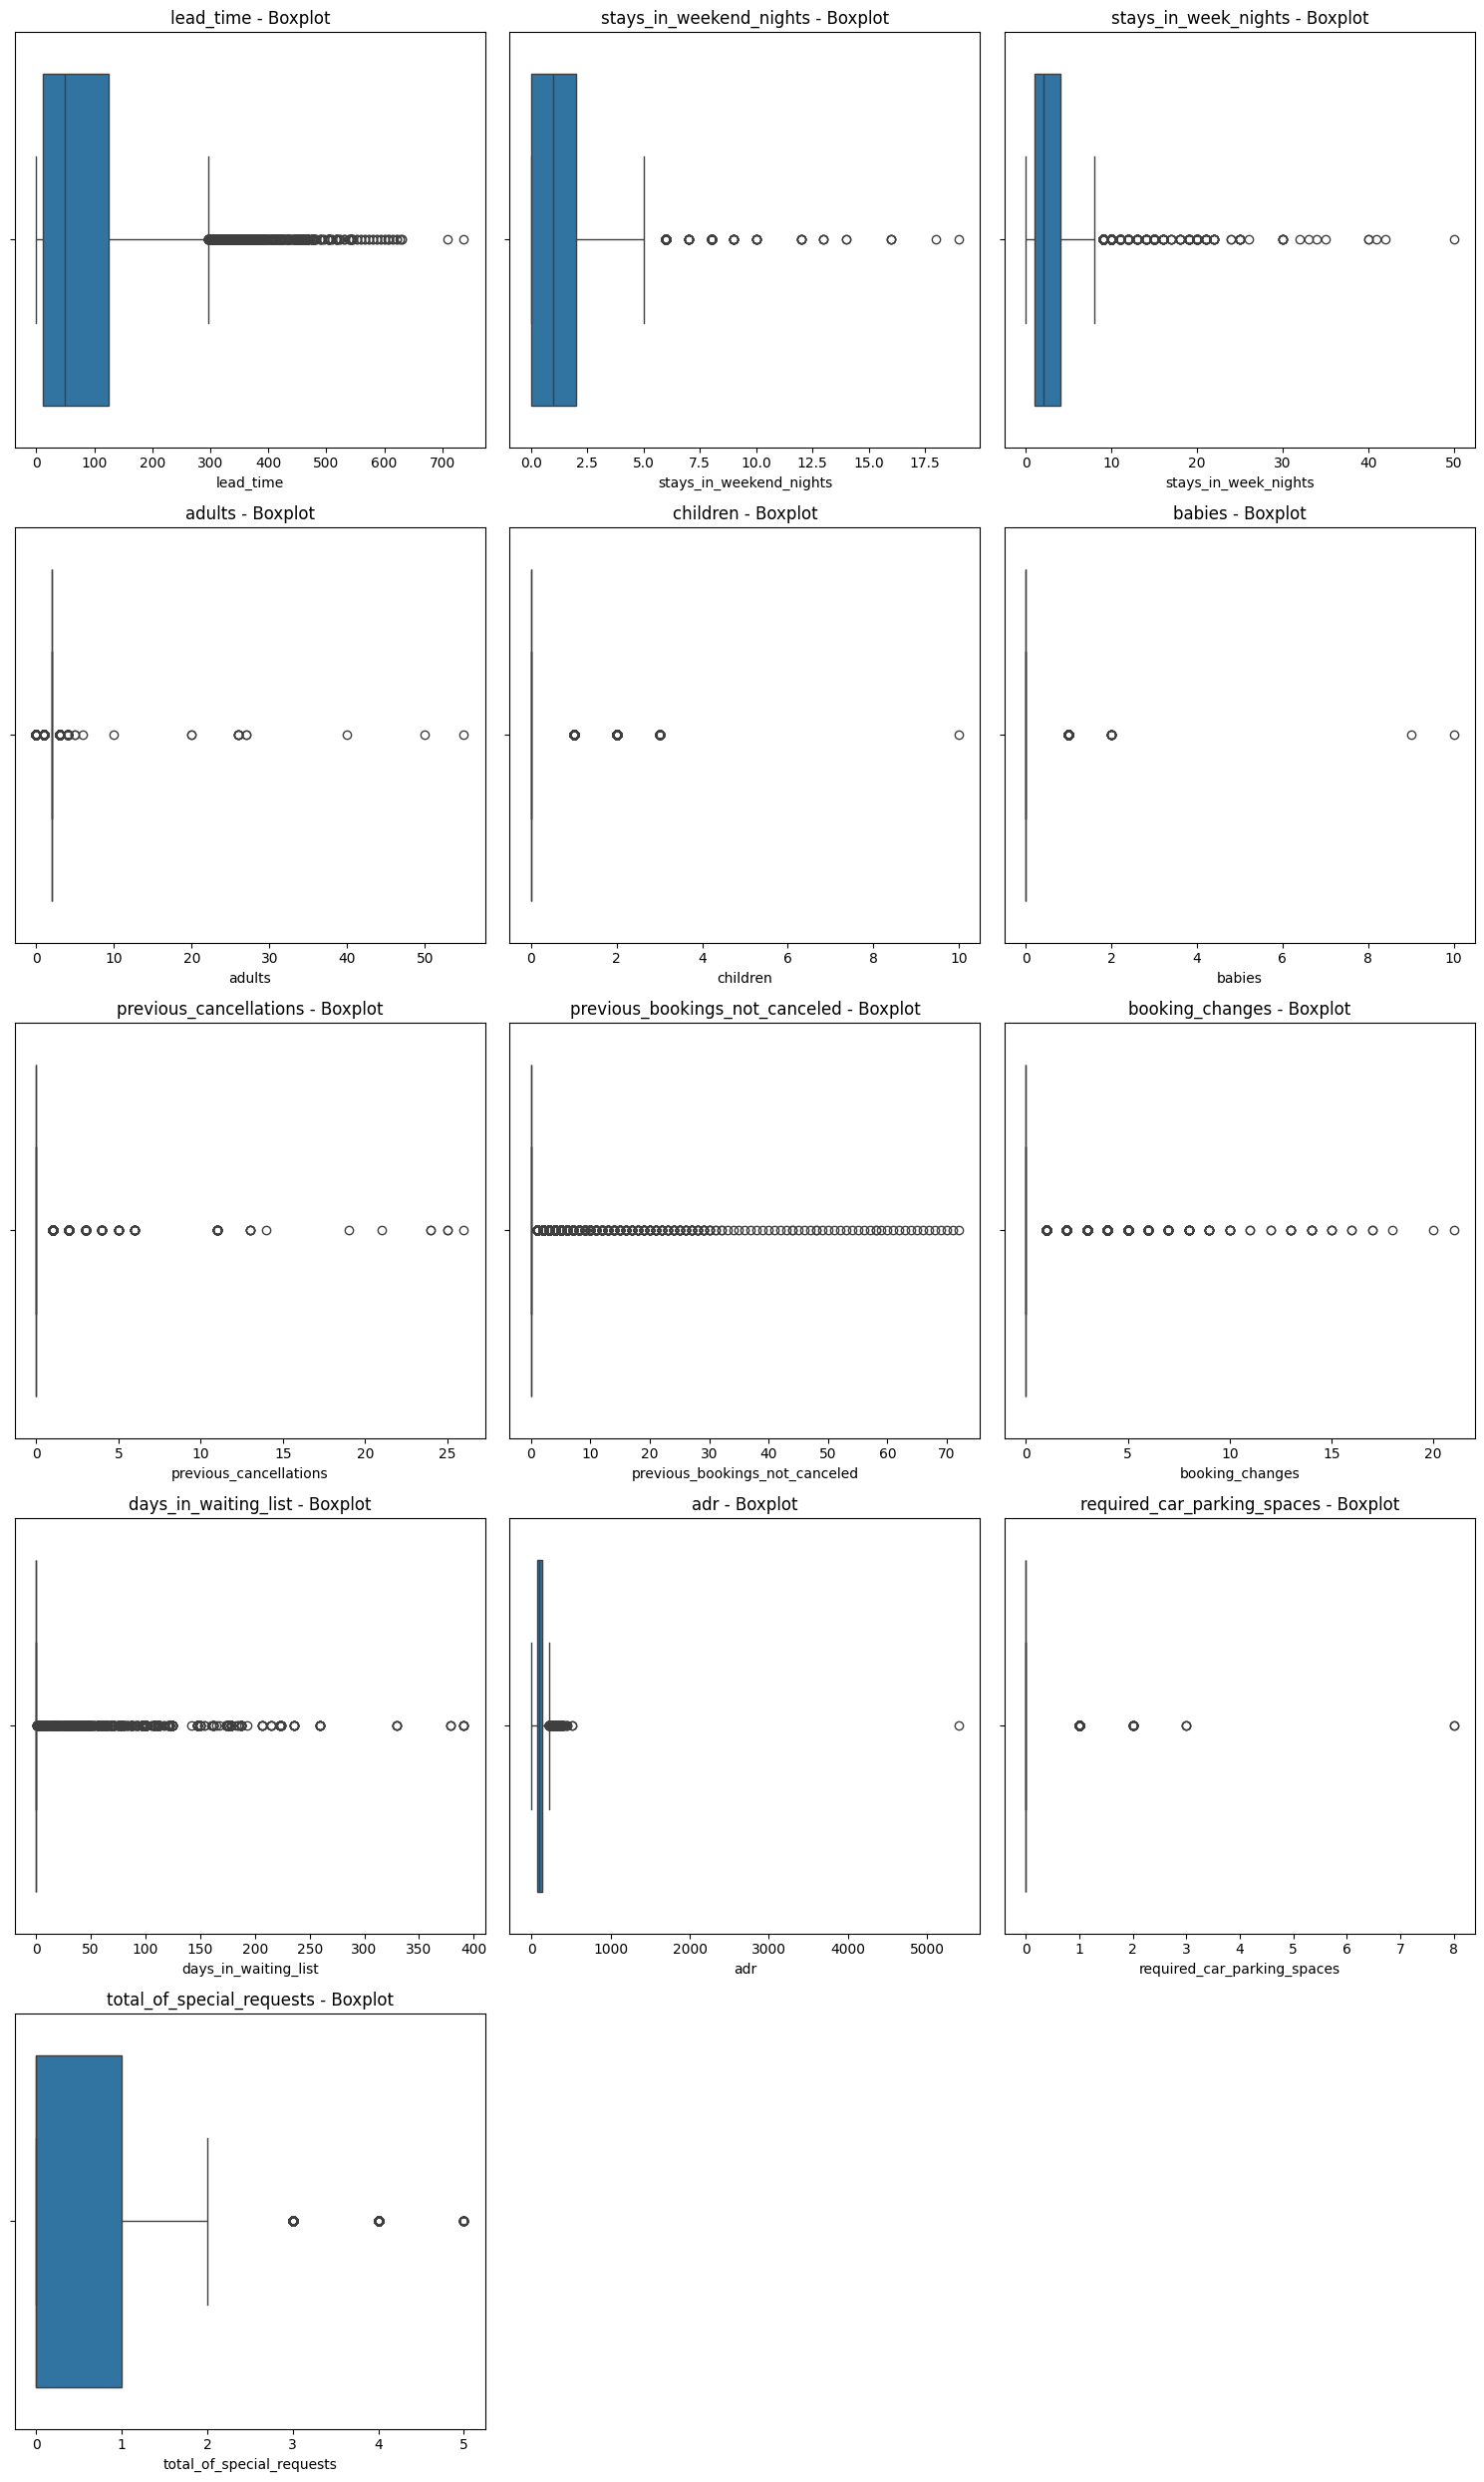

,Attribute (Numerical Features),Lower Fence,Upper Fence,# Lower,# Inside,# Upper,% Outlier
0,lead_time,-160.0,296.0,0,85000,2396,2.74
1,stays_in_weekend_nights,-3.0,5.0,0,87176,220,0.25
2,stays_in_week_nights,-3.5,8.5,0,85865,1531,1.75
3,adults,2.0,2.0,16888,64497,6011,26.20
4,children,0.0,0.0,0,79032,8364,9.57
5,babies,0.0,0.0,0,86482,914,1.05
6,previous_cancellations,0.0,0.0,0,85711,1685,1.93
7,previous_bookings_not_canceled,0.0,0.0,0,83851,3545,4.06
8,booking_changes,0.0,0.0,0,71494,15902,18.20
9,days_in_waiting_list,0.0,0.0,0,86536,860,0.98


In [29]:
# Inisialisasi list untuk menyimpan hasil perhitungan outliers
list_lower = []
list_upper = []
number_lower = []
number_inside = []
number_upper = []
percentage_outlier = []

# Pilih fitur numerikal untuk analisis outliers
numerical_out_check = df_no_duplicate[['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies',
                                  'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'days_in_waiting_list',
                                  'adr', 'required_car_parking_spaces', 'total_of_special_requests']]

# Tentukan jumlah subplot berdasarkan jumlah fitur numerikal
num_plots = len(numerical_out_check.columns)
rows = math.ceil(num_plots / 3)
cols = min(3, num_plots)

# Ukuran keseluruhan subplot
plt.figure(figsize=(15, 5 * rows))

# Loop untuk menghitung dan menampilkan outliers serta visualisasi boxplot
for i, feature in enumerate(numerical_out_check.columns):
    IQR = numerical_out_check[feature].quantile(0.75) - numerical_out_check[feature].quantile(0.25)
    lower_fence = numerical_out_check[feature].quantile(0.25) - 1.5 * IQR
    upper_fence = numerical_out_check[feature].quantile(0.75) + 1.5 * IQR
    list_lower.append(lower_fence)
    list_upper.append(upper_fence)
    number_lower.append(len(numerical_out_check[numerical_out_check[feature] < lower_fence]))
    number_inside.append(len(numerical_out_check[(numerical_out_check[feature] >= lower_fence) & (numerical_out_check[feature] <= upper_fence)]))
    number_upper.append(len(numerical_out_check[numerical_out_check[feature] > upper_fence]))
    percentage_outlier.append(round((len(numerical_out_check[numerical_out_check[feature] < lower_fence]) + len(numerical_out_check[numerical_out_check[feature] > upper_fence])) / len(numerical_out_check) * 100, 2))

    # Menentukan subplot untuk visualisasi boxplot
    plt.subplot(rows, cols, i + 1)
    sns.boxplot(x=numerical_out_check[feature])
    plt.title(f'{feature} - Boxplot')

plt.tight_layout()
plt.show()

# Membuat DataFrame untuk menampilkan hasil perhitungan outliers
check_outliers_df = pd.DataFrame({
    "Attribute (Numerical Features)": numerical_out_check.columns, 
    "Lower Fence": list_lower,
    "Upper Fence": list_upper,
    "# Lower": number_lower,
    "# Inside": number_inside,
    "# Upper": number_upper,
    "% Outlier": percentage_outlier
})

# Menampilkan DataFrame outliers
check_outliers_df


### **Proporsi Outlier pada Sejumlah Fitur Numerikal**

- **lead_time**: Memiliki sekitar 2.74% outlier yang sebagian besar berada di atas *upper fence*. Hal ini menunjukkan adanya beberapa pemesanan yang dilakukan jauh sebelumnya, lebih dari nilai yang diharapkan.

- **stays_in_weekend_nights** dan **stays_in_week_nights**: Kedua fitur ini memiliki persentase outlier yang sangat rendah, masing-masing 0.25% dan 1.75%. Ini menunjukkan bahwa durasi menginap pada akhir pekan dan hari kerja cukup konsisten dengan sedikit variasi nilai ekstrem.

- **adults**: Fitur ini memiliki jumlah outlier yang cukup tinggi yaitu sekitar 26.20%. Ini menunjukkan bahwa ada sejumlah besar pemesanan yang dilakukan untuk jumlah orang dewasa yang jauh lebih besar dari biasanya, yang kemungkinan besar terkait dengan acara kelompok atau konferensi.

- **children** dan **babies**: Kedua fitur ini juga memiliki persentase outlier yang cukup signifikan, masing-masing 9.57% dan 1.05%, menunjukkan adanya pemesanan yang melibatkan jumlah anak-anak atau bayi yang lebih banyak dari biasanya.

- **previous_cancellations** dan **previous_bookings_not_canceled**: Kedua fitur ini menunjukkan persentase outlier masing-masing 1.93% dan 4.06%, yang mengindikasikan adanya pelanggan dengan sejarah pembatalan atau pemesanan tanpa pembatalan yang sangat ekstrem.

- **booking_changes**: Fitur ini menunjukkan adanya 18.20% outlier, yang mengindikasikan beberapa pelanggan sering kali melakukan perubahan pada pemesanan mereka.

- **adr (Average Daily Rate)**: Fitur ini memiliki sekitar 2.85% outlier, yang mengindikasikan adanya variasi besar dalam tarif harian, mungkin dipengaruhi oleh musim, ketersediaan, atau faktor lain yang menyebabkan fluktuasi harga.

- **required_car_parking_spaces** dan **total_of_special_requests**: Kedua fitur ini memiliki outlier yang masing-masing berjumlah 8.37% dan 3.06%, menunjukkan bahwa terdapat preferensi tertentu dari pelanggan terkait permintaan khusus atau kebutuhan parkir yang lebih besar dari biasanya.

##### **Decision on Handling Outliers:**

Outlier tidak dihapus karena menghapus outlier berisiko menghilangkan informasi penting yang mungkin merepresentasikan variasi data yang valid. Outlier dalam kolom-kolom dataset ini mungkin mencerminkan keadaan khusus atau kasus unik yang penting untuk dianalisis. Misalnya, outlier dapat menunjukkan segmen pelanggan yang berbeda atau situasi luar biasa yang harus diperhatikan dalam model. Namun, kita akan tetap menangani data yang tampak anomali dengan hati-hati menggunakan *domain knowledge* untuk memastikan bahwa outlier yang benar-benar tidak relevan atau mengganggu dapat diidentifikasi dan dikelola dengan tepat.

#### **Identifying and Handling Data Entry Errors**

Bagian ini menunjukan lanjutan proses dari *handling outlier*, hal ini dilakukan untuk mengecek apakah terdapat nilai pada suatu kolom yang tidak masuk akal.

**Mengecek kesesuaian kolom `is_canceled` dan `reservation_status`**

In [30]:
# Menampilkan kolom is_canceled yang bernilai 1 dan reservation_status bernilai Canceled
df_no_duplicate[(df_no_duplicate["is_canceled"] == 0) & (df_no_duplicate["reservation_status"] == 'Canceled')]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,company_booked,agent_booked


In [31]:
# Menampilkan kolom is_canceled yang bernilai 0 dan reservation_status bernilai No-Show
df_no_duplicate[(df_no_duplicate["is_canceled"] == 0) & (df_no_duplicate["reservation_status"] == 'No-Show')]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,company_booked,agent_booked


In [32]:
# Menampilkan kolom is_canceled yang bernilai 1 dan reservation_status bernilai Check-Out
df_no_duplicate[(df_no_duplicate["is_canceled"] == 1) & (df_no_duplicate["reservation_status"] == 'Check-Out')]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,company_booked,agent_booked


**Menghapus pemesanan dengan nilai 0 pada kolom `adults`, `children`, dan `babies`**

In [33]:
# Menampilkan kolom adults, children, babies yang bernilai 0
df_no_duplicate[(df_no_duplicate["adults"] == 0) & (df_no_duplicate["children"] == 0) & (df_no_duplicate["babies"] == 0)]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,company_booked,agent_booked
2224,Resort Hotel,0,1,2015,October,41,6,0,3,0,0,0,SC,PRT,Corporate,Corporate,0,0,0,A,I,1,No Deposit,NaN,174.0,0,Transient-Party,0.00,0,0,Check-Out,2015-10-06,1,0
2409,Resort Hotel,0,0,2015,October,42,12,0,0,0,0,0,SC,PRT,Corporate,Corporate,0,0,0,A,I,0,No Deposit,NaN,174.0,0,Transient,0.00,0,0,Check-Out,2015-10-12,1,0
3181,Resort Hotel,0,36,2015,November,47,20,1,2,0,0,0,SC,ESP,Groups,TA/TO,0,0,0,A,C,0,No Deposit,38.0,NaN,0,Transient-Party,0.00,0,0,Check-Out,2015-11-23,0,1
3684,Resort Hotel,0,165,2015,December,53,30,1,4,0,0,0,SC,PRT,Groups,TA/TO,0,0,0,A,A,1,No Deposit,308.0,NaN,122,Transient-Party,0.00,0,0,Check-Out,2016-01-04,0,1
3708,Resort Hotel,0,165,2015,December,53,30,2,4,0,0,0,SC,PRT,Groups,TA/TO,0,0,0,A,C,1,No Deposit,308.0,NaN,122,Transient-Party,0.00,0,0,Check-Out,2016-01-05,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115029,City Hotel,0,107,2017,June,26,27,0,3,0,0,0,BB,CHE,Online TA,TA/TO,0,0,0,A,A,1,No Deposit,7.0,NaN,0,Transient,100.80,0,0,Check-Out,2017-06-30,0,1
115091,City Hotel,0,1,2017,June,26,30,0,1,0,0,0,SC,PRT,Complementary,Direct,0,0,0,E,K,0,No Deposit,NaN,NaN,0,Transient,0.00,1,1,Check-Out,2017-07-01,0,0
116251,City Hotel,0,44,2017,July,28,15,1,1,0,0,0,SC,SWE,Online TA,TA/TO,0,0,0,A,K,2,No Deposit,425.0,NaN,0,Transient,73.80,0,0,Check-Out,2017-07-17,0,1
116534,City Hotel,0,2,2017,July,28,15,2,5,0,0,0,SC,RUS,Online TA,TA/TO,0,0,0,A,K,1,No Deposit,9.0,NaN,0,Transient-Party,22.86,0,1,Check-Out,2017-07-22,0,1


Pada dataset terdapat entri di mana jumlah tamu tercatat sebagai 0. Hal ini tidak mungkin secara logis, karena jika ada pemesanan kamar hotel, seharusnya ada minimal 1 tamu yang menginap. Oleh karena itu, data yang akan digunakan untuk analisis dan pemodelan adalah data di mana total jumlah tamu lebih dari 0. Dengan demikian, kita memastikan bahwa data yang digunakan merepresentasikan skenario yang valid dan masuk akal dalam konteks pemesanan hotel.

In [34]:
df_no_duplicate.drop(df_no_duplicate[(df_no_duplicate["adults"] == 0) & 
             (df_no_duplicate["children"] == 0) & 
             (df_no_duplicate["babies"] == 0)].index, inplace=True)

**Menghapus jumlah hari menginap bernilai 0 pada kolom `stays_in_weekend_nights` dan `stays_in_week_nights`**

In [35]:
# Menampilkan kolom stays_in_weekend_nights bernilai 0 tapi kolom stays_in_week_nights bernilai 0
df_no_duplicate[(df_no_duplicate["stays_in_weekend_nights"] == 0) & (df_no_duplicate["stays_in_week_nights"] == 0)]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,company_booked,agent_booked
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,0,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,0,0
167,Resort Hotel,0,111,2015,July,28,6,0,0,2,0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,H,0,No Deposit,240.0,NaN,0,Transient,0.0,0,2,Check-Out,2015-07-06,0,1
168,Resort Hotel,0,0,2015,July,28,6,0,0,1,0,0,BB,PRT,Direct,Direct,0,0,0,E,H,0,No Deposit,250.0,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-06,0,1
196,Resort Hotel,0,8,2015,July,28,7,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,A,A,0,No Deposit,NaN,NaN,0,Transient,0.0,0,1,Check-Out,2015-07-07,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115483,City Hotel,0,15,2017,July,27,6,0,0,1,0,0,SC,FRA,Direct,Direct,0,0,0,A,A,0,No Deposit,14.0,NaN,0,Transient-Party,0.0,0,0,Check-Out,2017-07-06,0,1
117701,City Hotel,0,0,2017,August,32,8,0,0,2,0,0,BB,PRT,Offline TA/TO,TA/TO,1,0,0,A,A,0,No Deposit,262.0,NaN,0,Transient,0.0,0,0,Check-Out,2017-08-08,0,1
118029,City Hotel,0,0,2017,August,33,14,0,0,2,0,0,BB,PRT,Direct,Direct,1,0,0,A,A,0,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2017-08-14,0,0
118631,City Hotel,0,78,2017,August,34,23,0,0,1,0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,A,K,7,No Deposit,98.0,NaN,0,Transient-Party,0.0,0,0,Check-Out,2017-08-23,0,1


In [36]:
# Menampilkan kolom stays_in_weekend_nights > 5 tapi kolom stays_in_week_nights bernilai 0
df_no_duplicate[(df_no_duplicate["stays_in_weekend_nights"] > 5) & (df_no_duplicate["stays_in_week_nights"] == 0)]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,company_booked,agent_booked


Pada dataset terdapat entri di mana jumlah hari menginap tercatat sebagai 0. Hal ini secara logis tidak mungkin terjadi, karena jika seorang pelanggan menginap di sebuah hotel, seharusnya jumlah hari menginapnya lebih dari 0. Oleh karena itu, data yang mencatat jumlah hari menginap sebesar 0 akan dihapus dari dataset. Langkah ini diambil untuk memastikan bahwa analisis dan model yang dibangun hanya berdasarkan data yang valid dan representatif dari skenario nyata pemesanan hotel.

In [37]:
df_no_duplicate.drop(df_no_duplicate[(df_no_duplicate["stays_in_weekend_nights"] == 0) & 
        (df_no_duplicate["stays_in_week_nights"] == 0)].index, inplace=True)

**Menghapus nilai `adr` yang tidak masuk akal**

In [38]:
df_no_duplicate[df_no_duplicate['adr'] == df_no_duplicate['adr'].min()]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,company_booked,agent_booked
14969,Resort Hotel,0,195,2017,March,10,5,4,6,2,0,0,BB,GBR,Groups,Direct,1,0,2,A,H,2,No Deposit,273.0,NaN,0,Transient-Party,-6.38,0,0,Check-Out,2017-03-15,0,1


Nilai 0 mungkin terjadi dalam kasus di mana hotel tidak mendapatkan keuntungan dari penjualan kamar. Hal ini dapat terjadi karena kemungkinan seperti, kamar merupakan bagian dari bonus paket.

In [39]:
df_no_duplicate[df_no_duplicate['adr'] == df_no_duplicate['adr'].max()]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,company_booked,agent_booked
48515,City Hotel,1,35,2016,March,13,25,0,1,2,0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,1,Non Refund,12.0,NaN,0,Transient,5400.0,0,0,Canceled,2016-02-19,0,1


In [40]:
pd.DataFrame(df_no_duplicate['adr'].unique(), columns=['adr']).sort_values(by='adr', ascending=False)

,adr
6239,5400.00
8616,510.00
2852,508.00
8396,451.50
2598,450.00
...,...
6154,1.00
6149,0.50
5061,0.26
74,0.00


Pada dataset, terdapat entri di mana nilai maksimal `adr` (Average Daily Rate) mencapai 5.400 Euro. Ini merupakan harga yang sangat tinggi jika dibandingkan dengan data lainnya dalam dataset. Nilai yang ekstrem seperti ini kemungkinan besar merupakan outlier yang tidak merepresentasikan kondisi umum dari data dan dapat mengganggu analisis atau model prediksi. Oleh karena itu, data dengan nilai `adr` sebesar 5.400 Euro akan dihapus dari dataset. Langkah ini diambil untuk memastikan bahwa analisis dan model yang dibangun didasarkan pada data yang lebih representatif dan bebas dari pengaruh outlier ekstrem yang tidak realistis.

In [41]:
df_cleaned = df_no_duplicate.loc[df_no_duplicate['adr'] < 5400]
df_cleaned

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,company_booked,agent_booked
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02,0,0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02,0,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03,0,1
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,NaN,NaN,0,Transient,107.00,0,0,Check-Out,2015-07-03,0,0
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,0,0,FB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,303.0,NaN,0,Transient,103.00,0,1,Check-Out,2015-07-03,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06,0,1
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07,0,1
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07,0,1
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07,0,1


**Menghapus pemesanan `required_car_parking_spaces` yang tidak sesuai**

In [42]:
df_cleaned['required_car_parking_spaces'].value_counts()

required_car_parking_spaces
0    79348
1    7257 
2    28   
3    3    
8    2    
Name: count, dtype: int64

In [44]:
df_cleaned[df_cleaned['required_car_parking_spaces']>=3]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,company_booked,agent_booked
29045,Resort Hotel,0,26,2017,March,11,14,0,5,2,0,0,HB,AUT,Direct,Corporate,1,0,2,E,I,1,No Deposit,NaN,NaN,0,Transient-Party,40.00,8,1,Check-Out,2017-03-19,0,0
29046,Resort Hotel,0,138,2017,March,12,19,2,2,2,0,0,HB,AUT,Direct,Corporate,1,0,2,E,F,1,No Deposit,NaN,NaN,122,Transient-Party,80.00,8,0,Check-Out,2017-03-23,0,0
38117,Resort Hotel,0,205,2017,June,26,26,3,10,2,0,0,BB,PRT,Direct,Direct,0,0,0,A,A,2,No Deposit,250.0,NaN,0,Transient,111.00,3,0,Check-Out,2017-07-09,0,1
102762,City Hotel,0,13,2016,December,50,5,1,0,1,0,0,BB,NLD,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,96.00,3,0,Check-Out,2016-12-06,0,1
110812,City Hotel,0,30,2017,April,17,29,2,1,2,0,0,SC,ESP,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient-Party,153.33,3,2,Check-Out,2017-05-02,0,1


Pada dataset terdapat data dimana jumlah pengunjung (adult) tidak senilai dengan permintaan parkir mobil yang dibutuhkan. Oleh karena itu data diputuskan untuk dihapus.

In [45]:
df_cleaned1 = df_cleaned.loc[df_cleaned['required_car_parking_spaces'] < 3]
df_cleaned1

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,company_booked,agent_booked
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02,0,0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02,0,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03,0,1
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,NaN,NaN,0,Transient,107.00,0,0,Check-Out,2015-07-03,0,0
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,0,0,FB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,303.0,NaN,0,Transient,103.00,0,1,Check-Out,2015-07-03,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06,0,1
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07,0,1
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07,0,1
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07,0,1


**Menghapus jumlah `babies` yang tidak sesuai**

In [46]:
df_cleaned1['babies'].value_counts()

babies
0     85724
1     892  
2     15   
10    1    
9     1    
Name: count, dtype: int64

In [47]:
df_cleaned1[df_cleaned1['babies']>2]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,company_booked,agent_booked
46619,City Hotel,0,37,2016,January,3,12,0,2,2,0,10,BB,PRT,Online TA,TA/TO,0,0,0,D,D,1,No Deposit,9.0,NaN,0,Transient,84.45,0,1,Check-Out,2016-01-14,0,1
78656,City Hotel,0,11,2015,October,42,11,2,1,1,0,9,BB,GBR,Corporate,Corporate,0,0,0,A,B,1,No Deposit,95.0,NaN,0,Transient-Party,95.00,0,0,Check-Out,2015-10-14,0,1


Pada dataset city terdapat data dimana jumlah bayi yang terlalu banyak dalam pemesanan kamar. Oleh karena itu jumlah bayi yang lebih besar dari 2 akan dianggap sebagai data anomali maka akan didrop.

In [48]:
df_cleaned2 = df_cleaned1.loc[df_cleaned1['babies'] < 3]
df_cleaned2

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,company_booked,agent_booked
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02,0,0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02,0,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03,0,1
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,NaN,NaN,0,Transient,107.00,0,0,Check-Out,2015-07-03,0,0
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,0,0,FB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,303.0,NaN,0,Transient,103.00,0,1,Check-Out,2015-07-03,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06,0,1
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07,0,1
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07,0,1
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07,0,1


**Menyesuaikan unique value `meal`**

In [49]:
df_cleaned2['meal'].value_counts()

meal
BB           67414
SC           9345 
HB           9028 
Undefined    485  
FB           359  
Name: count, dtype: int64

Pada kolom `meal` terdapat unique value Undefined dan disini dapat diganti dengan SC dikarenakan keduanya dapat diasumsikan memiliki arti yang sama yaitu tidak memesan makanan.

In [50]:
# Mengganti hasil Undefined menjadi SC
df_cleaned2["meal"] = df_cleaned2["meal"].replace("Undefined", "SC")

df_cleaned2['meal'].value_counts()

meal
BB    67414
SC    9830 
HB    9028 
FB    359  
Name: count, dtype: int64

<hr>

## **<center> RFM Analysis**

<hr>

In [51]:
# menyiapkan dataset
df_analisis = df_cleaned2.copy()
df_analisis

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,company_booked,agent_booked
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02,0,0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02,0,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03,0,1
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,NaN,NaN,0,Transient,107.00,0,0,Check-Out,2015-07-03,0,0
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,0,0,FB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,303.0,NaN,0,Transient,103.00,0,1,Check-Out,2015-07-03,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06,0,1
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07,0,1
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07,0,1
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07,0,1


In [52]:
# mengubah tipe data kolom 'reservation_status_date' menjadi datetime
df_analisis['reservation_status_date'] = pd.to_datetime(df_analisis['reservation_status_date'])

# mengubah tipe data kolom 'agent' menjadi object
df_analisis['agent'] = df_analisis['agent'].fillna('0').astype('int')
df_analisis['agent'] = df_analisis['agent'].replace(0, 'Unknown').astype('object')

# mengubah tipe data kolom 'company' menjadi object
df_analisis['company'] = df_analisis['company'].fillna('0').astype('int')
df_analisis['company'] = df_analisis['company'].replace(0, 'Unknown').astype('object')

In [53]:
# Split dataset into two based on `agent` and `company`
# Ensure 'agent' and 'company' are not 'Unknown' and bookings are not canceled

df_agent =df_analisis[(df_analisis['agent'] != 'Unknown') & (df_analisis['is_canceled'] == 0)]
df_company =df_analisis[(df_analisis['company'] != 'Unknown') & (df_analisis['is_canceled'] == 0)]

# Display the first few rows of each dataset to verify
print(f"Dataset sebelum displit: {df_analisis.shape}")

print(f"Dataset berdasarkan id agent: {df_agent.shape}")
display(df_agent.head())

print(f"\nDataset berdasarkan id company: {df_company.shape}")
display(df_company.head())

Dataset sebelum displit: (86631, 34)
Dataset berdasarkan id agent: (52230, 34)


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,company_booked,agent_booked
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304,Unknown,0,Transient,75.0,0,0,Check-Out,2015-07-02,0,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240,Unknown,0,Transient,98.0,0,1,Check-Out,2015-07-03,0,1
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,0,0,FB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,303,Unknown,0,Transient,103.0,0,1,Check-Out,2015-07-03,0,1
11,Resort Hotel,0,35,2015,July,27,1,0,4,2,0,0,HB,PRT,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,240,Unknown,0,Transient,145.0,0,0,Check-Out,2015-07-05,0,1
12,Resort Hotel,0,68,2015,July,27,1,0,4,2,0,0,BB,USA,Online TA,TA/TO,0,0,0,D,E,0,No Deposit,240,Unknown,0,Transient,97.0,0,3,Check-Out,2015-07-05,0,1



Dataset berdasarkan id company: (4607, 34)


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,company_booked,agent_booked
18,Resort Hotel,0,0,2015,July,27,1,0,1,2,0,0,BB,FRA,Corporate,Corporate,0,0,0,A,G,0,No Deposit,Unknown,110,0,Transient,107.42,0,0,Check-Out,2015-07-02,1,0
220,Resort Hotel,0,1,2015,July,28,8,0,2,2,0,0,BB,CHE,Corporate,Corporate,0,0,0,A,F,0,No Deposit,Unknown,110,0,Transient,104.72,1,1,Check-Out,2015-07-10,1,0
295,Resort Hotel,0,84,2015,July,28,11,1,1,2,0,0,HB,PRT,Corporate,Corporate,0,0,0,A,A,0,No Deposit,Unknown,113,0,Transient,100.00,1,0,Check-Out,2015-07-13,1,0
387,Resort Hotel,0,1,2015,July,29,14,0,1,1,0,0,BB,PRT,Corporate,Corporate,0,0,0,A,A,0,No Deposit,Unknown,270,0,Transient,134.00,0,0,Check-Out,2015-07-15,1,0
541,Resort Hotel,0,0,2015,July,30,19,1,0,2,0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,Unknown,240,0,Group,88.20,0,0,Check-Out,2015-07-20,1,0


### **RFM Analysis based on `Agent ID`**

In [54]:
display(df_agent['agent'].nunique())
display(df_company['company'].nunique())

314

328

#### **Calculating Recency**

In [55]:
df_recency_agent = df_agent.groupby(by='agent', 
                        as_index=False)['reservation_status_date'].max()
df_recency_agent.columns = ['AgentID', 'LastPurchaseDate']
recent_date = df_recency_agent['LastPurchaseDate'].max()
df_recency_agent['Recency'] = df_recency_agent['LastPurchaseDate'].apply(
    lambda x: (recent_date - x).days)
df_recency_agent

,AgentID,LastPurchaseDate,Recency
0,1,2017-04-23,144
1,2,2017-08-13,32
2,3,2017-08-23,22
3,4,2015-09-17,728
4,5,2017-09-02,12
...,...,...,...
309,510,2017-01-31,226
310,526,2017-08-30,15
311,527,2017-04-29,138
312,531,2017-09-01,13


#### **Calculating Frequency**

In [56]:
df_frequency_agent = df_agent.groupby(
    by=['agent'], as_index=False)['reservation_status_date'].count()
df_frequency_agent.columns = ['AgentID', 'Frequency']
df_frequency_agent.sort_values(by='Frequency', ascending=False)

,AgentID,Frequency
8,9,17135
164,240,7966
6,7,2846
13,14,2747
173,250,2272
...,...,...
257,397,1
224,333,1
170,247,1
252,388,1


In [57]:
df_frequency_agent = df_agent.groupby(
    by=['agent'], as_index=False)['reservation_status_date'].count()
df_frequency_agent.columns = ['AgentID', 'Frequency']
df_frequency_agent.sort_values(by='Frequency', ascending=False)

,AgentID,Frequency
8,9,17135
164,240,7966
6,7,2846
13,14,2747
173,250,2272
...,...,...
257,397,1
224,333,1
170,247,1
252,388,1


#### **Calculating Monetary (Profitgain per ID)**

In [58]:
df_monetary_agent = df_agent.groupby(by='agent', as_index=False)['adr'].sum()
df_monetary_agent.columns = ['AgentID', 'Monetary'] # monetary adjusted from adr or profit per id
df_monetary_agent

,AgentID,Monetary
0,1,60888.57
1,2,7994.86
2,3,20991.69
3,4,358.67
4,5,18724.84
...,...,...
309,510,40.00
310,526,1002.60
311,527,2588.56
312,531,2897.43


#### **Merged All DataFrame**

In [59]:
rf_df = df_recency_agent.merge(df_frequency_agent, on='AgentID')
rfm_df = rf_df.merge(df_monetary_agent, on='AgentID').drop(
    columns='LastPurchaseDate')
rfm_df

,AgentID,Recency,Frequency,Monetary
0,1,144,769,60888.57
1,2,32,114,7994.86
2,3,22,260,20991.69
3,4,728,6,358.67
4,5,12,164,18724.84
...,...,...,...,...
309,510,226,1,40.00
310,526,15,9,1002.60
311,527,138,25,2588.56
312,531,13,21,2897.43


In [60]:
rfm_df['R_rank'] = rfm_df['Recency'].rank(ascending=False)
rfm_df['F_rank'] = rfm_df['Frequency'].rank(ascending=True)
rfm_df['M_rank'] = rfm_df['Monetary'].rank(ascending=True)
 
# normalizing the rank of the customers
rfm_df['R_rank_norm'] = (rfm_df['R_rank']/rfm_df['R_rank'].max())*100
rfm_df['F_rank_norm'] = (rfm_df['F_rank']/rfm_df['F_rank'].max())*100
rfm_df['M_rank_norm'] = (rfm_df['F_rank']/rfm_df['M_rank'].max())*100
 
rfm_df.drop(columns=['R_rank', 'F_rank', 'M_rank'], inplace=True)
 
rfm_df

,AgentID,Recency,Frequency,Monetary,R_rank_norm,F_rank_norm,M_rank_norm
0,1,144,769,60888.57,57.097289,96.815287,96.815287
1,2,32,114,7994.86,75.279107,85.031847,85.031847
2,3,22,260,20991.69,79.585327,93.630573,93.630573
3,4,728,6,358.67,2.711324,41.560510,41.560510
4,5,12,164,18724.84,89.473684,89.808917,89.808917
...,...,...,...,...,...,...,...
309,510,226,1,40.00,49.601276,9.872611,9.872611
310,526,15,9,1002.60,84.370016,47.133758,47.133758
311,527,138,25,2588.56,59.330144,66.719745,66.719745
312,531,13,21,2897.43,87.719298,64.331210,64.331210


#### **Calculated RFM Score**

RFM score is calculated based upon recency, frequency, monetary value normalize ranks. Based upon this score we divide our customers. Here we rate them on a scale of 5. Formula used for calculating rfm score is : 0.15*Recency score + 0.28*Frequency score + 0.57 *Monetary score

RFM scoring weights (0.15 for Recency, 0.28 for Frequency, and 0.57 for Monetary) are commonly used in industry to prioritize customer segments based on their financial impact. These weights reflect the strategic importance of high-value customers, as often observed in marketing analytics practices. Due to the lack of a single standardized source, this approach is justified by the needs of our specific business case.

In [61]:
rfm_df['RFM_Score'] = 0.15*rfm_df['R_rank_norm']+0.28 * \
    rfm_df['F_rank_norm']+0.57*rfm_df['M_rank_norm']
rfm_df['RFM_Score'] *= 0.05
rfm_df = rfm_df.round(2)
rfm_df[['AgentID', 'RFM_Score']]

,AgentID,RFM_Score
0,1,4.54
1,2,4.18
2,3,4.58
3,4,1.79
4,5,4.49
...,...,...
309,510,0.79
310,526,2.64
311,527,3.28
312,531,3.39


In [63]:
# Define the segmentation mapping based on RFM_Score
def segment_customer(rfm_score):
    if rfm_score >= 4.5:
        return 'Champions'
    elif 4.0 <= rfm_score < 4.5:
        return 'Loyal Customers'
    elif 3.5 <= rfm_score < 4.0:
        return 'Promising'
    elif 3.0 <= rfm_score < 3.5:
        return 'New Customers'
    elif 2.5 <= rfm_score < 3.0:
        return 'Abandoned Checkouts'
    elif 2.0 <= rfm_score < 2.5:
        return 'Warm Leads'
    elif 1.5 <= rfm_score < 2.0:
        return 'Cold Leads'
    elif 1.0 <= rfm_score < 1.5:
        return 'Need Attention'
    elif 0.5 <= rfm_score < 1.0:
        return 'Can’t Lose Them'
    elif rfm_score > 0 and rfm_score < 0.5:
        return 'Sleepers'
    else:
        return 'Lost'

# Apply the segmentation
rfm_df['Customer_Segment'] = rfm_df['RFM_Score'].apply(segment_customer)

# Display the final RFM DataFrame with segments
display(rfm_df[['AgentID', 'RFM_Score', 'Customer_Segment']])

# Show the distribution of the segments
print(rfm_df['Customer_Segment'].value_counts())


,AgentID,RFM_Score,Customer_Segment
0,1,4.54,Champions
1,2,4.18,Loyal Customers
2,3,4.58,Champions
3,4,1.79,Cold Leads
4,5,4.49,Loyal Customers
...,...,...,...
309,510,0.79,Can’t Lose Them
310,526,2.64,Abandoned Checkouts
311,527,3.28,New Customers
312,531,3.39,New Customers


Customer_Segment
Can’t Lose Them        52
Warm Leads             38
Cold Leads             34
Promising              34
Abandoned Checkouts    31
Champions              30
Loyal Customers        30
Need Attention         29
New Customers          27
Sleepers               9 
Name: count, dtype: int64


In [64]:
import plotly.express as px

# Hitung jumlah dan persentase dari setiap segmen pelanggan
segment_counts = rfm_df['Customer_Segment'].value_counts().reset_index()
segment_counts.columns = ['Segment', 'Count']
segment_counts['Percentage'] = (segment_counts['Count'] / segment_counts['Count'].sum()) * 100

# Buat Treemap
fig = px.treemap(segment_counts, 
                 path=['Segment'], 
                 values='Count', 
                 color='Segment', 
                 color_discrete_sequence=px.colors.qualitative.Pastel, 
                 title="Customer Segmentation Treemap by AgentID")

# Tambahkan informasi persentase pada label
fig.data[0].texttemplate = "%{label}<br>%{value} (%{percentParent:.2%})"

# Tampilkan plot
fig.show()

### **RFM Analysis based on `Company ID`**

In [65]:
display(df_agent['agent'].nunique())
display(df_company['company'].nunique())

314

328

#### **Calculating Recency**

In [66]:
df_recency_company = df_company.groupby(by='company', 
                        as_index=False)['reservation_status_date'].max()
df_recency_company.columns = ['CompanyID', 'LastPurchaseDate']
recent_date = df_recency_company['LastPurchaseDate'].max()
df_recency_company['Recency'] = df_recency_company['LastPurchaseDate'].apply(
    lambda x: (recent_date - x).days)
df_recency_company

,CompanyID,LastPurchaseDate,Recency
0,6,2016-04-09,511
1,8,2015-12-30,612
2,9,2017-04-05,150
3,10,2016-06-23,436
4,11,2015-11-02,670
...,...,...,...
323,528,2017-07-12,52
324,530,2017-05-17,108
325,534,2017-06-07,87
326,539,2017-07-07,57


#### **Calculating Frequency**

In [67]:
df_frequency_company = df_company.groupby(
    by=['company'], as_index=False)['reservation_status_date'].count()
df_frequency_company.columns = ['CompanyID', 'Frequency']
df_frequency_company.sort_values(by='Frequency', ascending=False).head(10)

,CompanyID,Frequency
19,40,777
124,223,469
22,45,206
86,153,160
87,154,124
120,219,122
96,174,105
161,281,103
131,233,86
53,94,70


In [68]:
df_frequency_company = df_company.groupby(
    by=['company'], as_index=False)['reservation_status_date'].count()
df_frequency_company.columns = ['CompanyID', 'Frequency']
df_frequency_company.sort_values(by='Frequency', ascending=False).head(10)

,CompanyID,Frequency
19,40,777
124,223,469
22,45,206
86,153,160
87,154,124
120,219,122
96,174,105
161,281,103
131,233,86
53,94,70


#### **Calculating Monetary (Profitgain per ID)**

In [69]:
df_monetary_company = df_company.groupby(by='company', as_index=False)['adr'].sum()
df_monetary_company.columns = ['CompanyID', 'Monetary'] # monetary adjusted from adr or profit per id
df_monetary_company

,CompanyID,Monetary
0,6,39.00
1,8,87.30
2,9,2114.95
3,10,79.00
4,11,90.40
...,...,...
323,528,190.50
324,530,199.00
325,534,90.00
326,539,174.00


#### **Merged All DataFrame**

In [70]:
rf_df_company = df_recency_company.merge(df_frequency_company, on='CompanyID')
rf_df_company = rf_df_company.merge(df_monetary_company, on='CompanyID').drop(
    columns='LastPurchaseDate')
rf_df_company

,CompanyID,Recency,Frequency,Monetary
0,6,511,1,39.00
1,8,612,1,87.30
2,9,150,33,2114.95
3,10,436,1,79.00
4,11,670,1,90.40
...,...,...,...,...
323,528,52,2,190.50
324,530,108,3,199.00
325,534,87,1,90.00
326,539,57,2,174.00


In [71]:
rf_df_company['R_rank'] = rf_df_company['Recency'].rank(ascending=False)
rf_df_company['F_rank'] = rf_df_company['Frequency'].rank(ascending=True)
rf_df_company['M_rank'] = rf_df_company['Monetary'].rank(ascending=True)
 
# normalizing the rank of the customers
rf_df_company['R_rank_norm'] = (rf_df_company['R_rank']/rf_df_company['R_rank'].max())*100
rf_df_company['F_rank_norm'] = (rf_df_company['F_rank']/rf_df_company['F_rank'].max())*100
rf_df_company['M_rank_norm'] = (rf_df_company['F_rank']/rf_df_company['M_rank'].max())*100
 
rf_df_company.drop(columns=['R_rank', 'F_rank', 'M_rank'], inplace=True)
 
rf_df_company

,CompanyID,Recency,Frequency,Monetary,R_rank_norm,F_rank_norm,M_rank_norm
0,6,511,1,39.00,14.939024,13.109756,13.109756
1,8,612,1,87.30,8.231707,13.109756,13.109756
2,9,150,33,2114.95,63.414634,93.445122,93.445122
3,10,436,1,79.00,21.036585,13.109756,13.109756
4,11,670,1,90.40,3.963415,13.109756,13.109756
...,...,...,...,...,...,...,...
323,528,52,2,190.50,89.634146,34.603659,34.603659
324,530,108,3,199.00,70.731707,45.274390,45.274390
325,534,87,1,90.00,78.353659,13.109756,13.109756
326,539,57,2,174.00,89.024390,34.603659,34.603659


#### **Calculated RFM Score**

RFM score is calculated based upon recency, frequency, monetary value normalize ranks. Based upon this score we divide our customers. Here we rate them on a scale of 5. Formula used for calculating rfm score is : 0.15*Recency score + 0.28*Frequency score + 0.57 *Monetary score

RFM scoring weights (0.15 for Recency, 0.28 for Frequency, and 0.57 for Monetary) are commonly used in industry to prioritize customer segments based on their financial impact. These weights reflect the strategic importance of high-value customers, as often observed in marketing analytics practices. Due to the lack of a single standardized source, this approach is justified by the needs of our specific business case.


In [72]:
rf_df_company['RFM_Score'] = 0.15*rf_df_company['R_rank_norm']+0.28 * \
    rf_df_company['F_rank_norm']+0.57*rf_df_company['M_rank_norm']
rf_df_company['RFM_Score'] *= 0.05
rf_df_company = rf_df_company.round(2)
rf_df_company[['CompanyID', 'RFM_Score']]

,CompanyID,RFM_Score
0,6,0.67
1,8,0.62
2,9,4.45
3,10,0.71
4,11,0.59
...,...,...
323,528,2.14
324,530,2.45
325,534,1.14
326,539,2.14


In [73]:
# Define the segmentation mapping based on RFM_Score
def segment_customer(rfm_score):
    if rfm_score >= 4.5:
        return 'Champions'
    elif 4.0 <= rfm_score < 4.5:
        return 'Loyal Customers'
    elif 3.5 <= rfm_score < 4.0:
        return 'Promising'
    elif 3.0 <= rfm_score < 3.5:
        return 'New Customers'
    elif 2.5 <= rfm_score < 3.0:
        return 'Abandoned Checkouts'
    elif 2.0 <= rfm_score < 2.5:
        return 'Warm Leads'
    elif 1.5 <= rfm_score < 2.0:
        return 'Cold Leads'
    elif 1.0 <= rfm_score < 1.5:
        return 'Need Attention'
    elif 0.5 <= rfm_score < 1.0:
        return 'Can’t Lose Them'
    elif rfm_score > 0 and rfm_score < 0.5:
        return 'Sleepers'
    else:
        return 'Lost'

# Apply the segmentation
rf_df_company['Customer_Segment'] = rf_df_company['RFM_Score'].apply(segment_customer)

# Display the final RFM DataFrame with segments
display(rf_df_company[['CompanyID', 'RFM_Score', 'Customer_Segment']])

# Show the distribution of the segments
print(rf_df_company['Customer_Segment'].value_counts())

,CompanyID,RFM_Score,Customer_Segment
0,6,0.67,Can’t Lose Them
1,8,0.62,Can’t Lose Them
2,9,4.45,Loyal Customers
3,10,0.71,Can’t Lose Them
4,11,0.59,Can’t Lose Them
...,...,...,...
323,528,2.14,Warm Leads
324,530,2.45,Warm Leads
325,534,1.14,Need Attention
326,539,2.14,Warm Leads


Customer_Segment
Can’t Lose Them        72
Cold Leads             51
Promising              37
New Customers          36
Abandoned Checkouts    35
Loyal Customers        30
Warm Leads             28
Champions              26
Need Attention         13
Name: count, dtype: int64


In [74]:
import plotly.express as px

# Hitung jumlah dan persentase dari setiap segmen pelanggan
segment_counts_company = rf_df_company['Customer_Segment'].value_counts().reset_index()
segment_counts_company.columns = ['Segment', 'Count']
segment_counts_company['Percentage'] = (segment_counts_company['Count'] / segment_counts_company['Count'].sum()) * 100

# Buat Treemap
fig = px.treemap(segment_counts_company, 
                 path=['Segment'], 
                 values='Count', 
                 color='Segment', 
                 color_discrete_sequence=px.colors.qualitative.Pastel, 
                 title="Customer Segmentation Treemap by CompanyID")

# Tambahkan informasi persentase pada label
fig.data[0].texttemplate = "%{label}<br>%{value} (%{percentParent:.2%})"

# Tampilkan plot
fig.show()

<hr>

## <center> **Conclusion**

<hr>

#### **Kesimpulan**

Berikut beberapa poin garis besar analisis segmentasi berdasarkan metrik Recency, Frequency dan Monetary (RFM) yang telah dilakukan:

- **Pembentukan 10 Segmentasi:**
   Analisis segmentasi RFM ini telah berhasil mengelompokkan tamu ke dalam 10 segmen berdasarkan metrik perilaku mereka terkait waktu transaksi terakhir, frekuensi pemesanan dan nilai moneter tamu hotel `Tuvoli`. Segmentasi tersebut secara berurutan adalah: `Champions`, `Loyal Customer`, `Promising`, `New Customers`, `Abandoned Checkouts`, `Warm Leads`, `Cold Leads`, `Need Attention`, `Can't Lose Them` dan `Sleepers`. Pembentukan segmentasi ini dapat membantu Hotel `Tuvoli` untuk lebih efektif dalam menargetkan upaya strategi pemesanan kamar hotel mereka

- **Dampak Bisnis:**
   Analisis segmentasi dini memberikan informasi yang dapat diimplementasikan secara langsung untuk meningkatkan manajemen pemesanan Hotel `Tuvoli`. Dengan fokus pada tamu bernilai tinggi dan `treatment` khsusus sesuai pengelompokan segmentasi tamu, pihak manajemen hotel dapat meningkatkan tingkat hunian dan profitabilitas secara keseluruhan.


<hr>

## <center> **Recommendation**

<hr>

> #### **Rekomendasi Umum**

1. **Melakukan strategi penawaran pemesanan secara khusus pada tiap segmen.**
   Pihak manajemen Hotel `Tuvoli` dapat memanfaatkan segmentasi RFM yang dilakukan untuk menciptakan kampanye pemasaran atau strategi penawaran pemesanan yang dipersonalisasi sesuai segmentasi tamu. Hal ini bertujuan untuk mempertahankan tamu bernilai tinggi dan mendorong pemesanan ulang dari tamu yang memiliki pengalaman bagus terhadap hotel.

2. **Melakukan kampanya atau strategi penawaran harga pada segmen tertentu.**
   Pihak manajemen HOtel `Tuvoli` dapat memberdayakan strategi harga berdasarkan informasi dari segmentasi tamu. Misalnya, tawarkan tarif khusus kepada tamu yang sering menginap atau yang memiliki riwayat pengeluaran tinggi.

> #### **Rekomendasi berdasarkan Segmentasi RFM**

1. **Champions**
   - **Konteks**: Ini adalah tamu yang paling sering dan banyak menghabiskan uang mereka di hotel Tuvoli. Mereka kemungkinan sangat puas dengan pengalaman mereka.
   - **Rekomendasi**: Tawarkan keuntungan eksklusif seperti upgrade gratis, layanan tambahan, atau akses ke acara khusus. Ajak mereka untuk membagikan pengalaman positif mereka di situs ulasan dan media sosial. Pertimbangkan mereka untuk program loyalitas khusus atau undangan ke acara hotel eksklusif.

2. **Loyal Customers**
   - **Konteks**: Tamu ini sering kembali dan menghabiskan uang secara konsisten. Mereka menghargai layanan yang dipersonalisasi dan nilai.
   - **Rekomendasi**: Berikan penawaran khusus dan sentuhan pribadi seperti catatan terima kasih yang ditulis tangan atau fasilitas gratis. Minta umpan balik mereka dan dorong mereka untuk mereferensikan teman atau keluarga.

3. **Promising**
   - **Konteks**: Ini adalah tamu yang sudah menginap beberapa kali dan menunjukkan potensi untuk menjadi pelanggan setia.
   - **Rekomendasi**: Kenalkan mereka pada program loyalitas dengan manfaat yang sesuai dengan preferensi mereka. Kirimkan penawaran atau hadiah pribadi dan lakukan follow-up dengan panggilan ramah untuk memperkuat hubungan.

4. **New Customers**
   - **Konteks**: Ini adalah tamu baru yang baru pertama kali menginap di hotel Tuvoli.
   - **Rekomendasi**: Pastikan mereka mendapatkan pengalaman pertama yang positif dengan menawarkan hadiah selamat datang atau diskon untuk kunjungan berikutnya. Mulailah membangun hubungan pribadi melalui komunikasi yang ramah.

5. **Abandoned Checkouts**
   - **Konteks**: Ini adalah tamu yang memulai proses pemesanan tetapi tidak menyelesaikannya.
   - **Rekomendasi**: Hubungi mereka dengan dukungan pribadi untuk menyelesaikan pemesanan mereka. Identifikasi dan atasi kekhawatiran atau hambatan yang mungkin mereka hadapi.

6. **Warm Leads**
   - **Konteks**: Ini adalah calon tamu yang menunjukkan minat namun belum melakukan pemesanan.
   - **Rekomendasi**: Hubungi mereka secara langsung dengan dukungan dan informasi yang dipersonalisasi. Identifikasi kebutuhan spesifik mereka dan bangun hubungan untuk mendorong konversi.

7. **Cold Leads**
   - **Konteks**: Ini adalah calon tamu yang pernah menunjukkan minat sebelumnya tetapi tidak aktif saat ini.
   - **Rekomendasi**: Hubungi mereka melalui kampanye email atau SMS yang ditargetkan untuk membangkitkan kembali minat mereka. Sesuaikan pesan untuk mencerminkan minat atau kebutuhan mereka sebelumnya.

8. **Need Attention**
   - **Konteks**: Ini adalah tamu yang memerlukan perhatian khusus karena potensi masalah atau ketidakpuasan.
   - **Rekomendasi**: Tawarkan penawaran khusus dengan batas waktu tertentu. Rekomendasikan produk atau layanan tambahan berdasarkan interaksi sebelumnya dan eksplorasi peluang untuk upselling atau cross-selling.

9. **Can’t Lose Them**
   - **Konteks**: Ini adalah tamu yang sangat penting dan berisiko kehilangan.
   - **Rekomendasi**: Tarik kembali mereka dengan penawaran eksklusif dan khusus. Lakukan survei untuk memahami kebutuhan mereka dan tangani masalah apa pun untuk mencegah churn.

10. **Sleepers**
    - **Konteks**: Ini adalah tamu yang telah lama tidak aktif.
    - **Rekomendasi**: Kirimkan email atau pesan pribadi untuk mencoba terhubung kembali. Berikan sumber daya atau informasi bermanfaat untuk menarik kembali perhatian mereka.

11. **Lost**
    - **Konteks**: Ini adalah tamu yang telah berhenti berinteraksi atau bertransaksi.
    - **Rekomendasi**: Cobalah membangkitkan kembali minat mereka dengan kampanye komunikasi terakhir. Jika tidak berhasil, pertimbangkan untuk tidak memprioritaskan mereka lebih lanjut.


<hr>

## <center> **Thank You**

<hr>